<a href="https://colab.research.google.com/github/anjanay-anjanay/DLNLP/blob/main/TimeSeriesRoboHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# 1.0.2
# Simplify file path handling
from pathlib import Path

In [2]:
# 1.1 Mount Google Drive for data access
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
# 1.2 Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
# 1.2.1 Where is our data:

pathToFolder = "/gdrive/MyDrive/Rac_robo_health"

In [5]:
# 1.2.2 specific path to the FIFA22 dataset file

path = Path(pathToFolder) / "robo_dataset.csv"

In [6]:
# 2.1 Load the data
df = pd.read_csv(path)

In [23]:
df.head()

Current J1  Position J1  Current J2  Position J2  Current J3  Position J3  \
0        1.61        14.25        0.09       -14.96       11.87        116.3   
1        3.94        14.25        0.10       -14.96       11.87        116.3   
2        3.94        14.25        0.10       -14.96       11.87        116.3   
3        2.52        14.25        0.11       -14.96       11.87        116.3   
4       -0.02        14.25        0.10       -14.96       11.87        116.3   

   Current J4  Position J4  Current J5  Position J5  Current J6  Position J6  \
0     -141.36          100       85.92      -110.56       22.43       -30.55   
1     -141.36          100      295.92      -110.94       24.59       -31.65   
2     -141.36          100      295.92      -110.94       24.59       -31.65   
3     -141.36          100      176.92      -110.63       23.53       -30.74   
4     -141.36          100      305.92      -109.69       24.24       -28.21   

                           Cycle Number        Date TimeStamp  
0  WSBYMBROW000061_11_20221006_21:41:12  06-10-2022  21:41:46  
1  WSBYMBROW000061_11_20221006_21:41:12  06-10-2022  21:41:46  
2  WSBYMBROW000061_11_20221006_21:41:12  06-10-2022  21:41:46  
3  WSBYMBROW000061_11_20221006_21:41:12  06-10-2022  21:41:47  
4  WSBYMBROW000061_11_20221006_21:41:12  06-10-2022  21:41:47

#DATA CLEANING

In [10]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Current J1      0
Position J1     0
Current J2      0
Position J2     0
Current J3      0
Position J3     0
Current J4      0
Position J4     0
Current J5      0
Position J5     0
Current J6      0
Position J6     0
Cycle Number    0
Date            0
TimeStamp       0
dtype: int64


#EDA

         Current J1   Position J1    Current J2   Position J2    Current J3  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   3.790780e-01  1.465824e+01  3.749529e-02 -1.623148e+01  1.108234e+01   
std    2.581270e+00  2.129767e+00  9.818740e-02  2.700963e+00  9.826218e-01   
min   -1.510000e+01 -2.000000e-02  0.000000e+00 -2.949200e+02  0.000000e+00   
25%    0.000000e+00  1.471000e+01  0.000000e+00 -1.726000e+01  1.111000e+01   
50%    0.000000e+00  1.471000e+01  0.000000e+00 -1.726000e+01  1.111000e+01   
75%    0.000000e+00  1.471000e+01  1.000000e-02 -1.506000e+01  1.111000e+01   
max    1.480000e+01  2.949200e+02  1.170000e+00  5.150000e+00  2.299000e+01   

        Position J3    Current J4   Position J4    Current J5   Position J5  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.174199e+02 -3.780129e+01  9.999320e+01 -5.838179e-01 -5.876072e+01   
std    5.283140e+00  8.158874e+01  7.161456e-01  1.

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

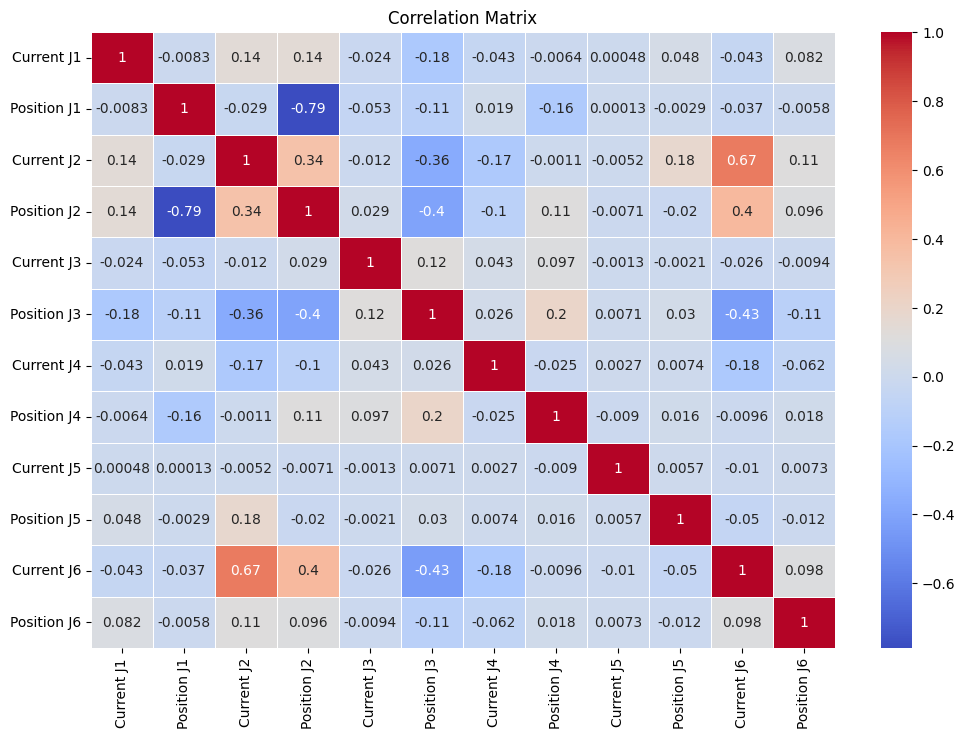

array([[<Axes: title={'center': 'Current J1'}>,
        <Axes: title={'center': 'Position J1'}>,
        <Axes: title={'center': 'Current J2'}>],
       [<Axes: title={'center': 'Position J2'}>,
        <Axes: title={'center': 'Current J3'}>,
        <Axes: title={'center': 'Position J3'}>],
       [<Axes: title={'center': 'Current J4'}>,
        <Axes: title={'center': 'Position J4'}>,
        <Axes: title={'center': 'Current J5'}>],
       [<Axes: title={'center': 'Position J5'}>,
        <Axes: title={'center': 'Current J6'}>,
        <Axes: title={'center': 'Position J6'}>]], dtype=object)

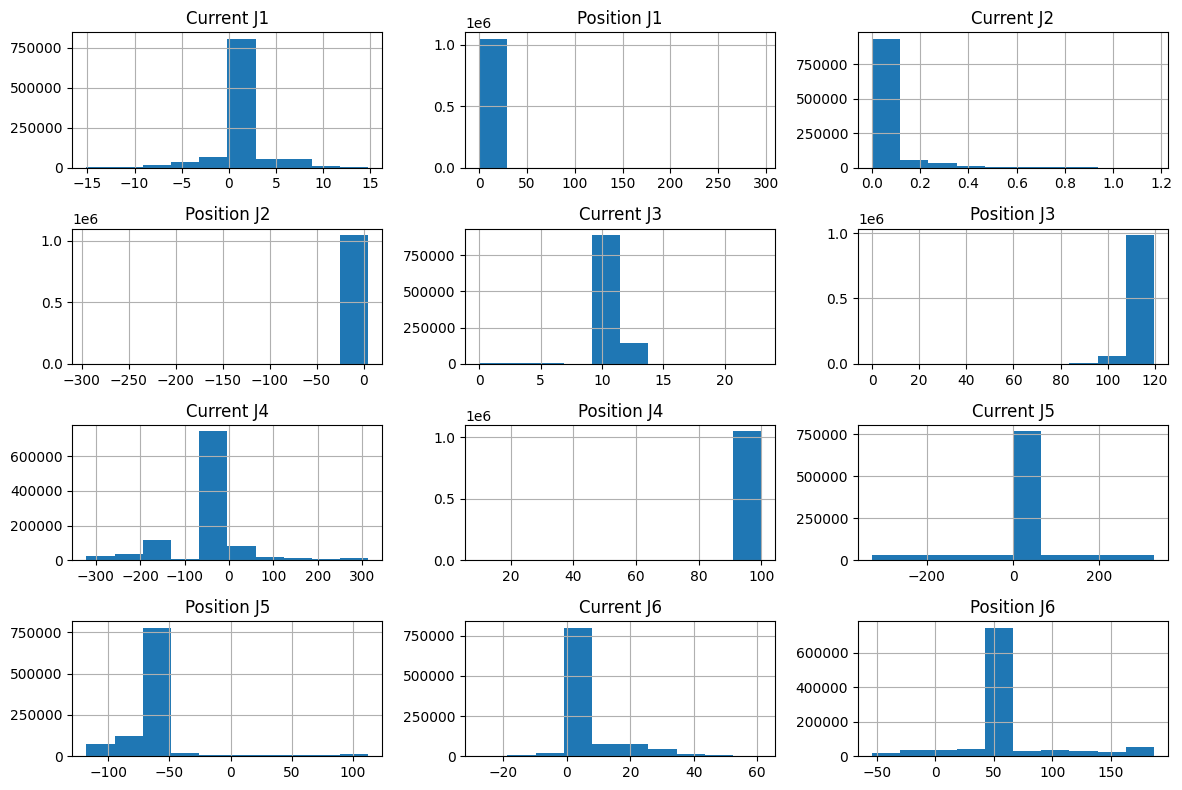

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Boxplots of Numeric Columns')

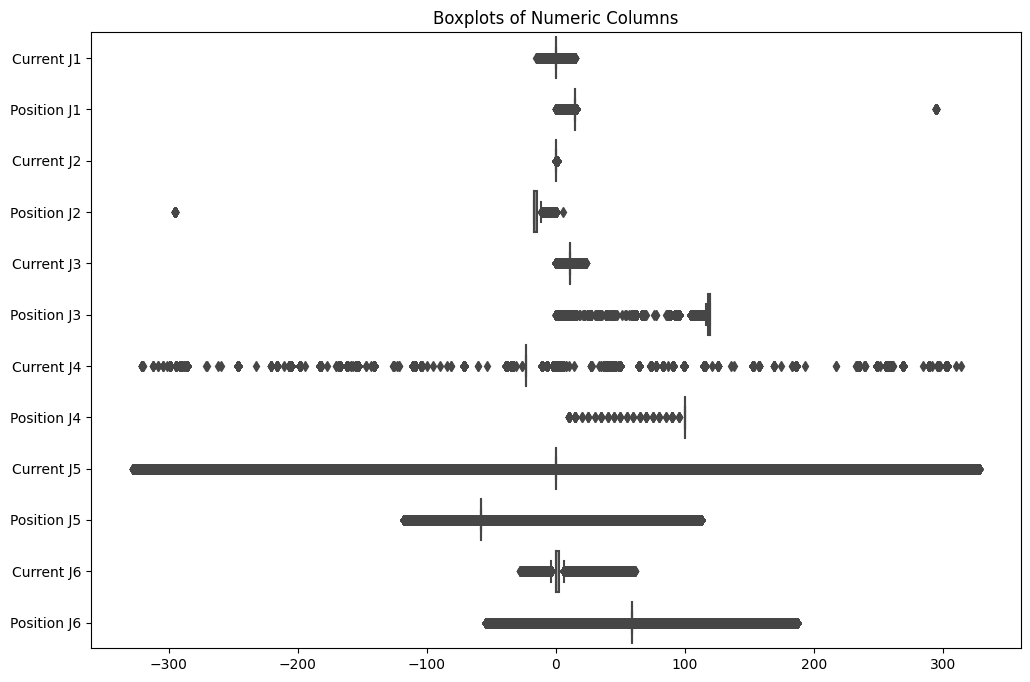

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Cycle Number', ylabel='count'>

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

Text(0.5, 1.0, 'Distribution of Cycle Number')

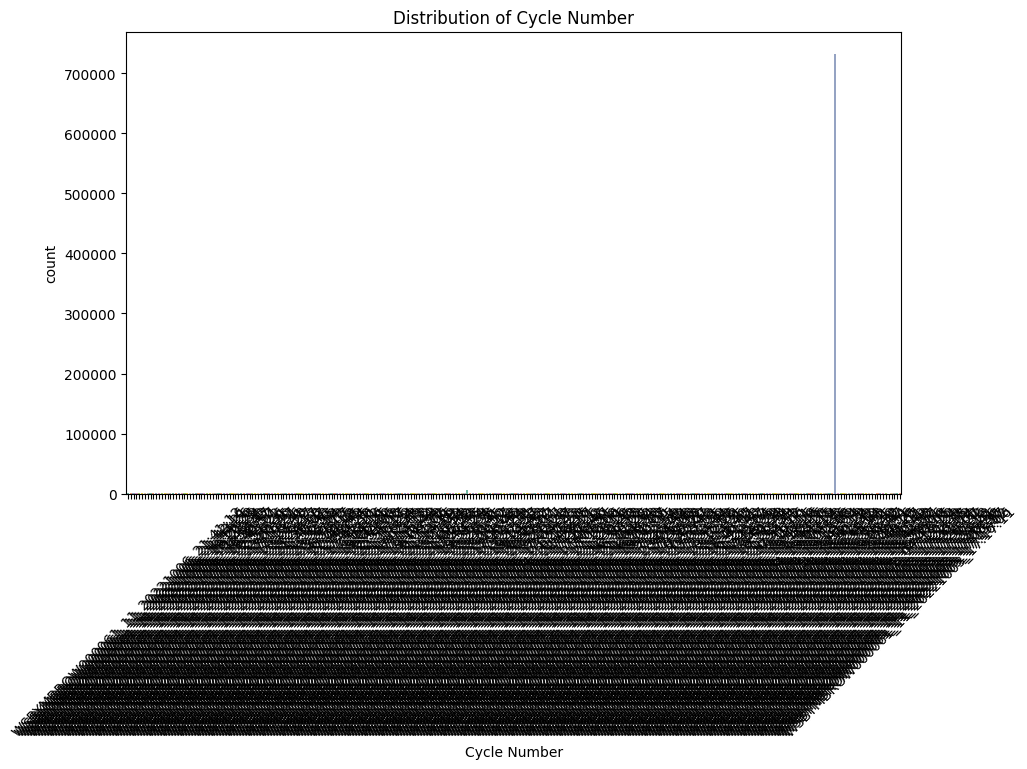

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Date', ylabel='count'>

(array([0, 1, 2, 3]),
 [Text(0, 0, '06-10-2022'),
  Text(1, 0, '04-10-2022'),
  Text(2, 0, '03-10-2022'),
  Text(3, 0, '02-10-2022')])

Text(0.5, 1.0, 'Distribution of Date')

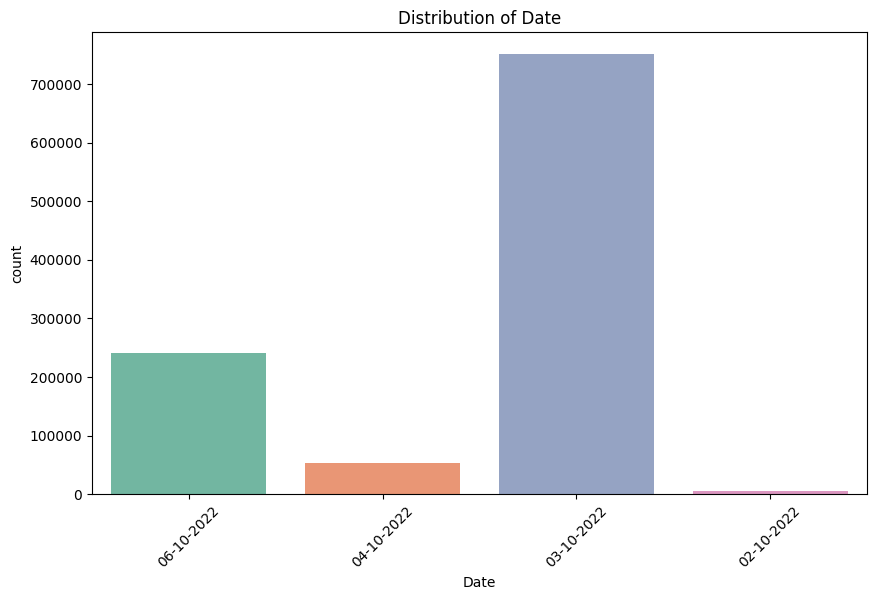

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='TimeStamp', ylabel='count'>

(array([    0,     1,     2, ..., 50252, 50253, 50254]),
 [Text(0, 0, '21:41:46'),
  Text(1, 0, '21:41:47'),
  Text(2, 0, '21:41:48'),
  Text(3, 0, '21:41:49'),
  Text(4, 0, '21:41:50'),
  Text(5, 0, '21:41:51'),
  Text(6, 0, '21:41:52'),
  Text(7, 0, '21:41:53'),
  Text(8, 0, '21:41:54'),
  Text(9, 0, '21:41:55'),
  Text(10, 0, '21:41:56'),
  Text(11, 0, '21:41:57'),
  Text(12, 0, '21:41:58'),
  Text(13, 0, '21:41:59'),
  Text(14, 0, '21:42:00'),
  Text(15, 0, '21:42:01'),
  Text(16, 0, '21:42:02'),
  Text(17, 0, '21:42:03'),
  Text(18, 0, '21:42:04'),
  Text(19, 0, '21:42:05'),
  Text(20, 0, '21:42:06'),
  Text(21, 0, '21:42:07'),
  Text(22, 0, '21:42:08'),
  Text(23, 0, '21:42:09'),
  Text(24, 0, '21:42:10'),
  Text(25, 0, '21:42:16'),
  Text(26, 0, '21:42:17'),
  Text(27, 0, '21:42:18'),
  Text(28, 0, '21:42:19'),
  Text(29, 0, '21:42:20'),
  Text(30, 0, '21:42:21'),
  Text(31, 0, '21:42:22'),
  Text(32, 0, '21:42:23'),
  Text(33, 0, '21:42:24'),
  Text(34, 0, '21:42:25'),
  Text(3

Text(0.5, 1.0, 'Distribution of TimeStamp')

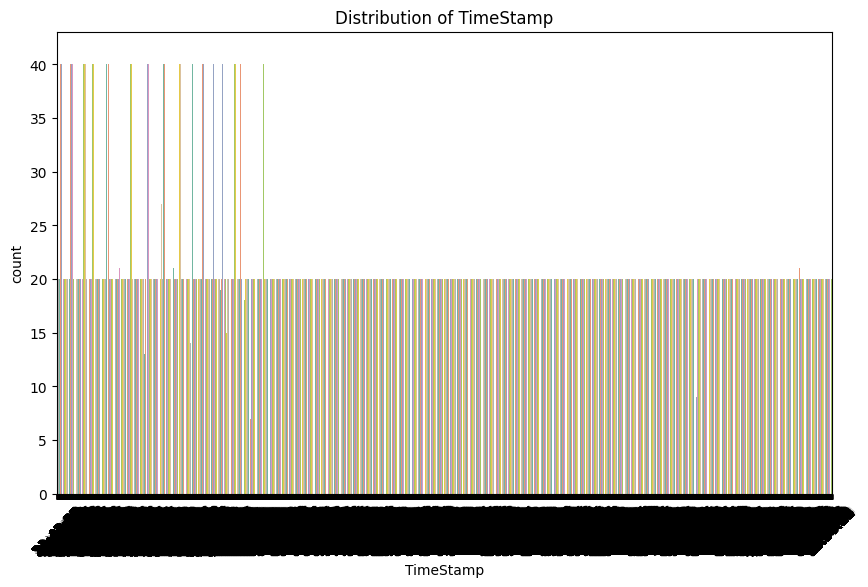

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J1')

Text(0.5, 1.0, 'Time Series Analysis of Current J1')

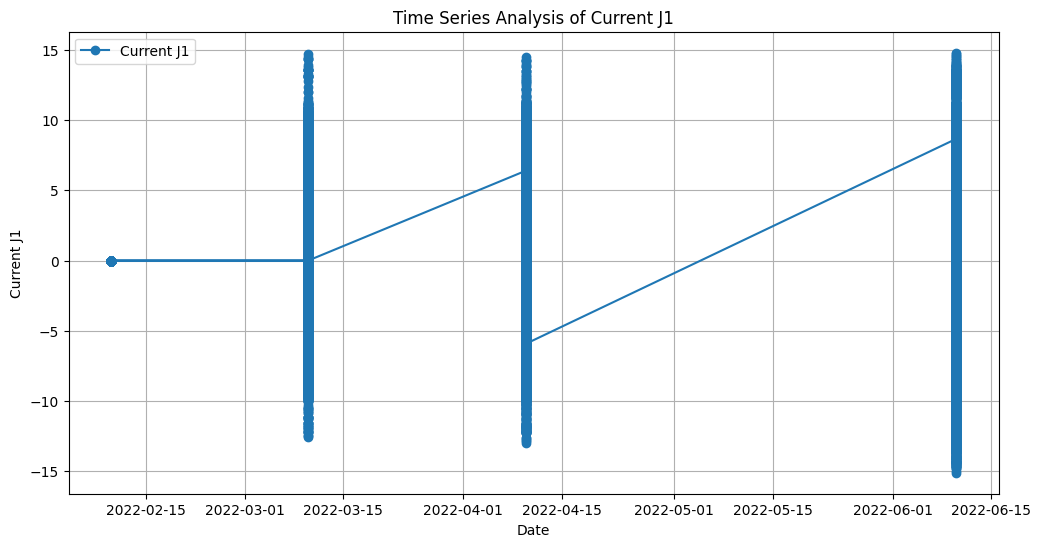

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print(df.describe())


# Pairwise correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
numeric_cols.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplots for numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_cols, orient="h")
plt.title('Boxplots of Numeric Columns')
plt.show()

# Distribution of categorical columns (e.g., Position J1)
categorical_cols = df.select_dtypes(include='object')
for col in categorical_cols.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

# Time Series Analysis (assuming "Date" is a datetime column)
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Current J1'], label='Current J1', marker='o')
plt.xlabel('Date')
plt.ylabel('Current J1')
plt.title('Time Series Analysis of Current J1')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J1')

Text(0.5, 1.0, 'Time Series Analysis of Current J1')

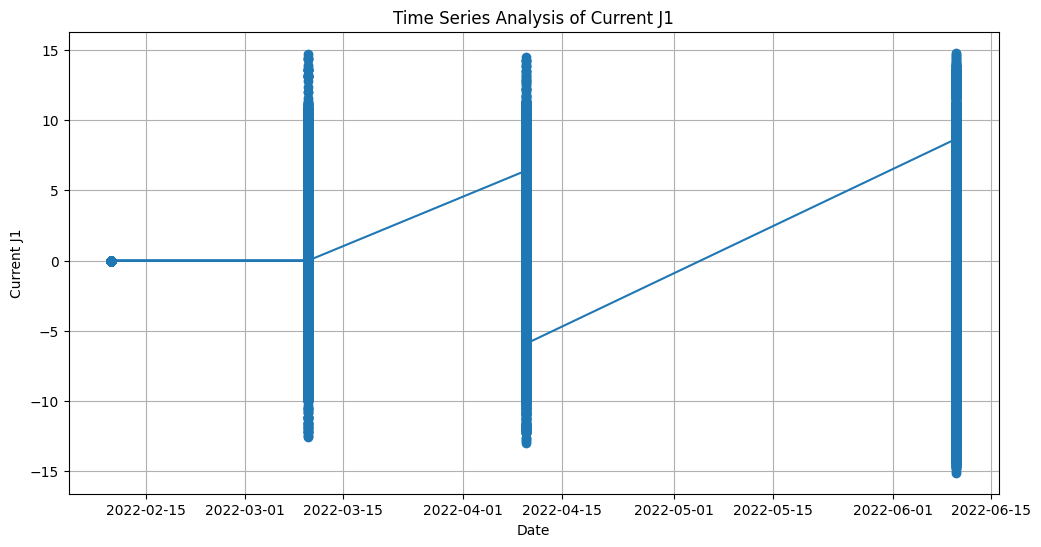

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J2')

Text(0.5, 1.0, 'Time Series Analysis of Current J2')

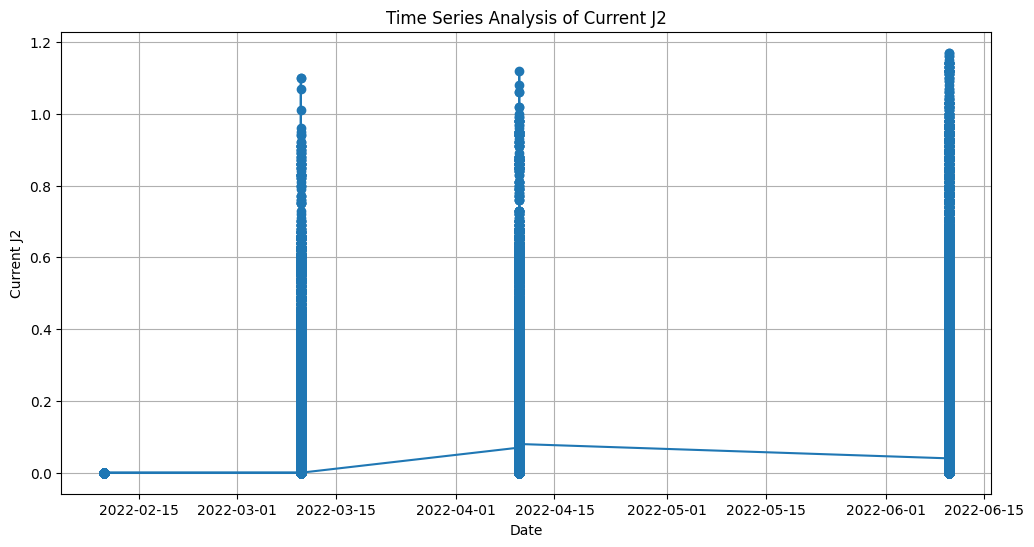

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J3')

Text(0.5, 1.0, 'Time Series Analysis of Current J3')

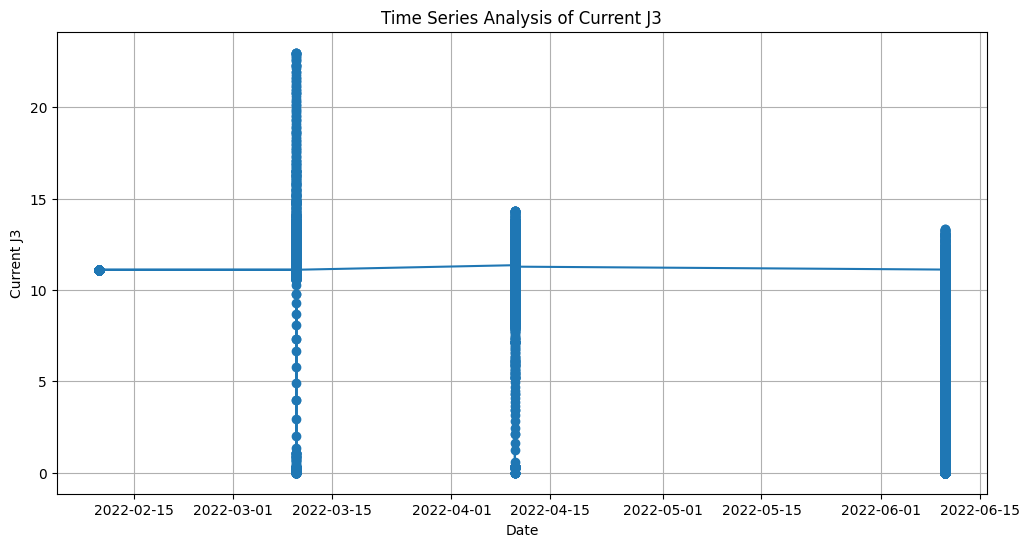

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J4')

Text(0.5, 1.0, 'Time Series Analysis of Current J4')

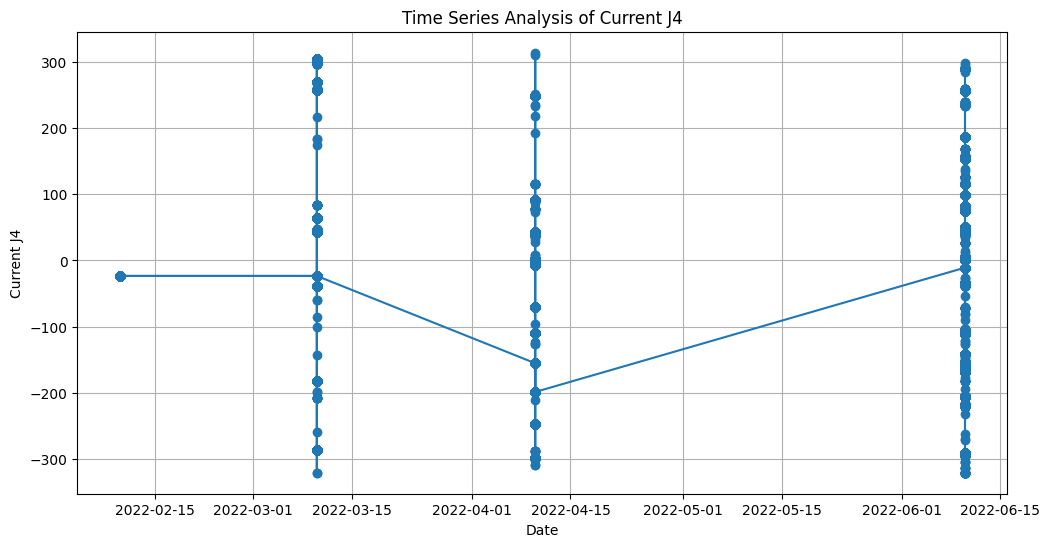

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J5')

Text(0.5, 1.0, 'Time Series Analysis of Current J5')

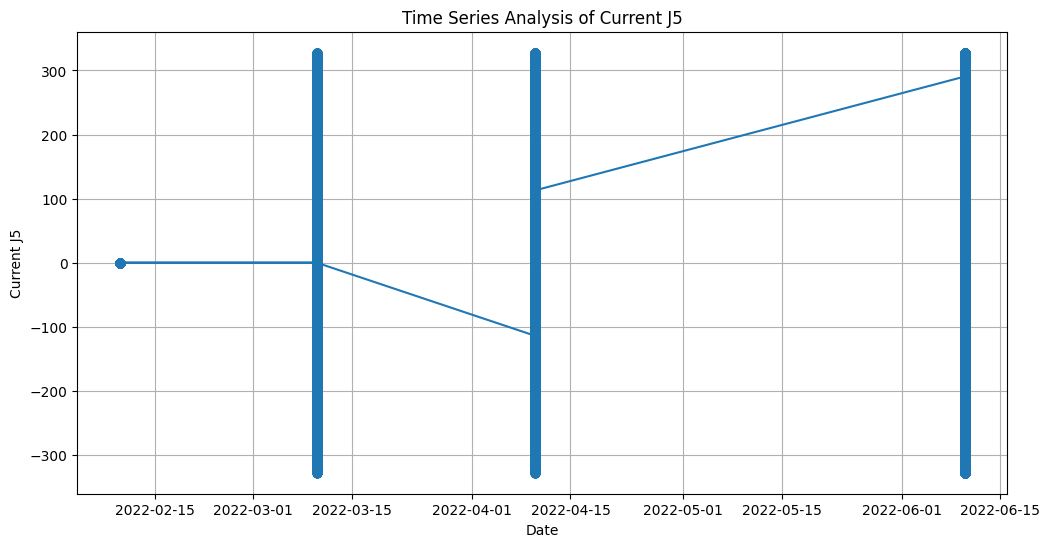

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J6')

Text(0.5, 1.0, 'Time Series Analysis of Current J6')

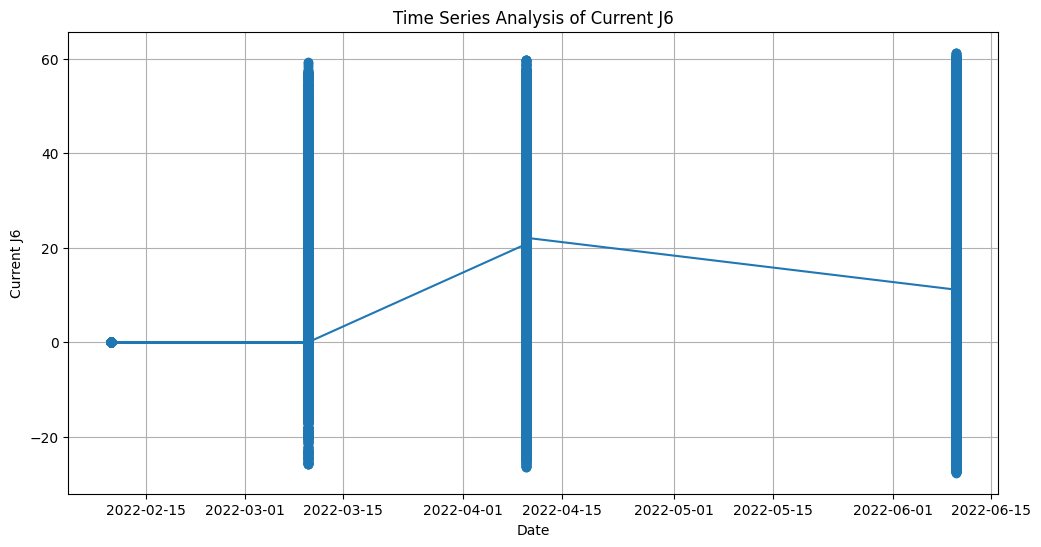

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# List of columns you want to analyze
columns_to_analyze = [
    'Current J1', 'Current J2', 'Current J3',
    'Current J4', 'Current J5', 'Current J6'
]

# Plot time series for each specified column
for column in columns_to_analyze:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[column], marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Time Series Analysis of {column}')
    plt.grid(True)
    plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J1')

Text(0.5, 1.0, 'Time Series Analysis of Position J1')

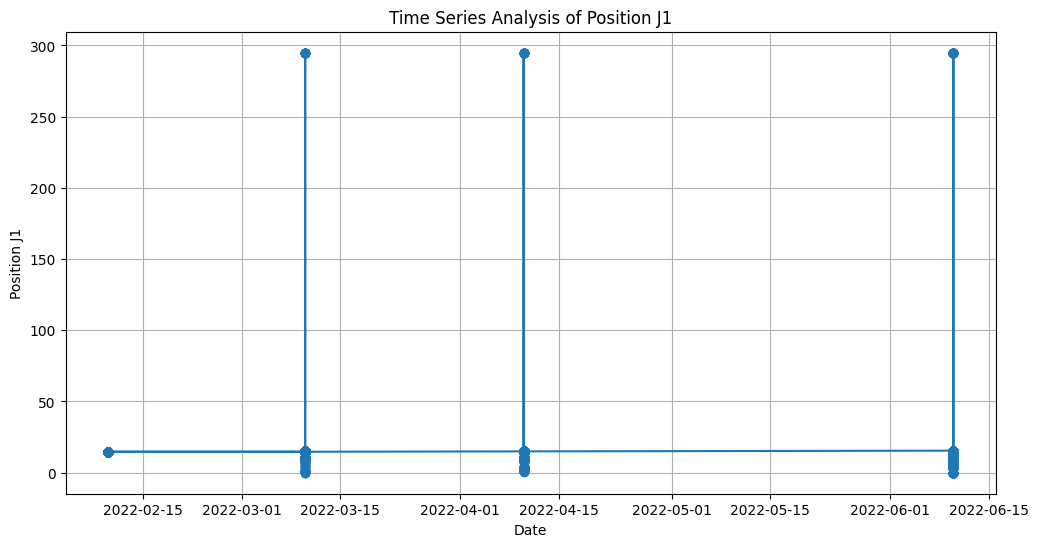

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J2')

Text(0.5, 1.0, 'Time Series Analysis of Position J2')

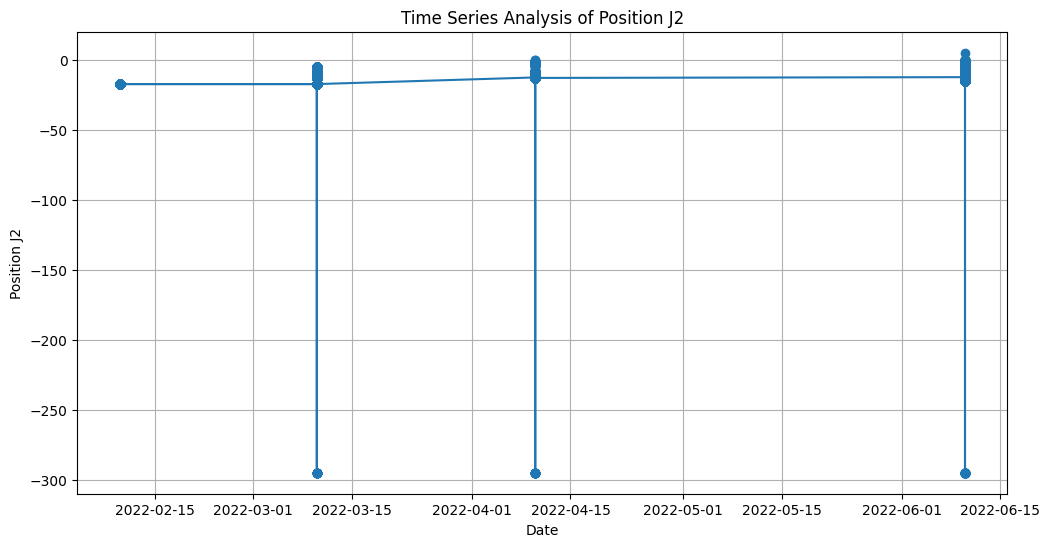

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J3')

Text(0.5, 1.0, 'Time Series Analysis of Position J3')

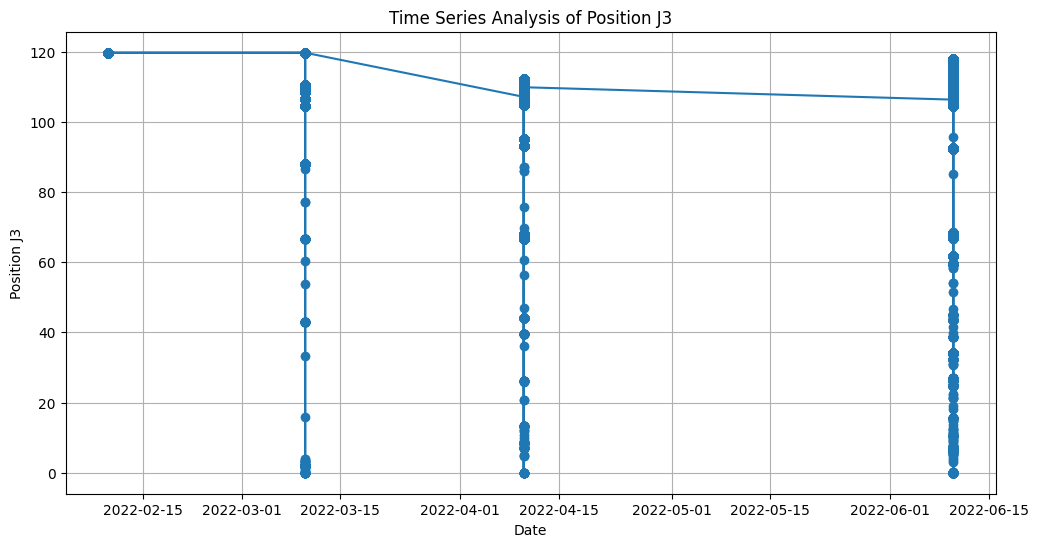

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J4')

Text(0.5, 1.0, 'Time Series Analysis of Position J4')

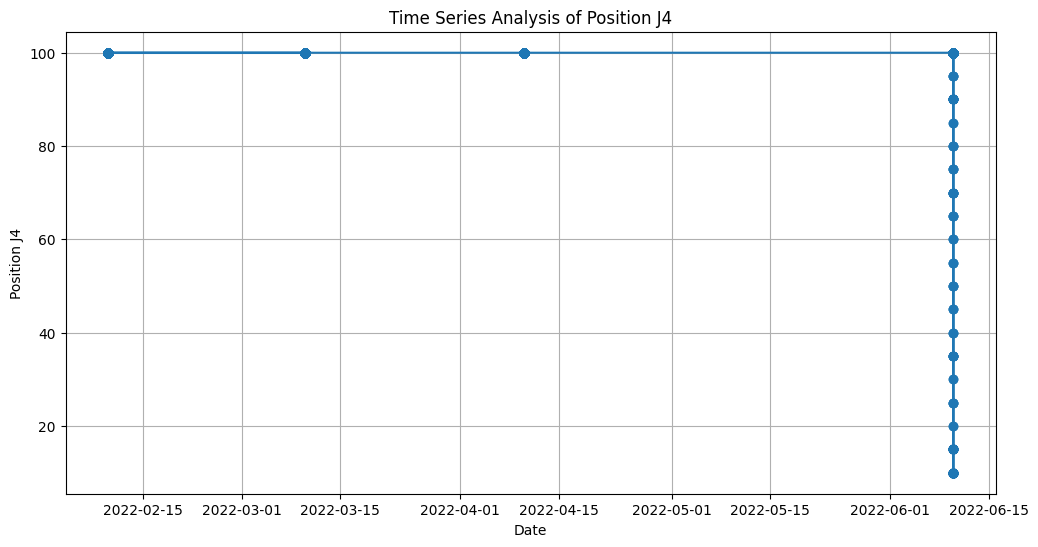

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J5')

Text(0.5, 1.0, 'Time Series Analysis of Position J5')

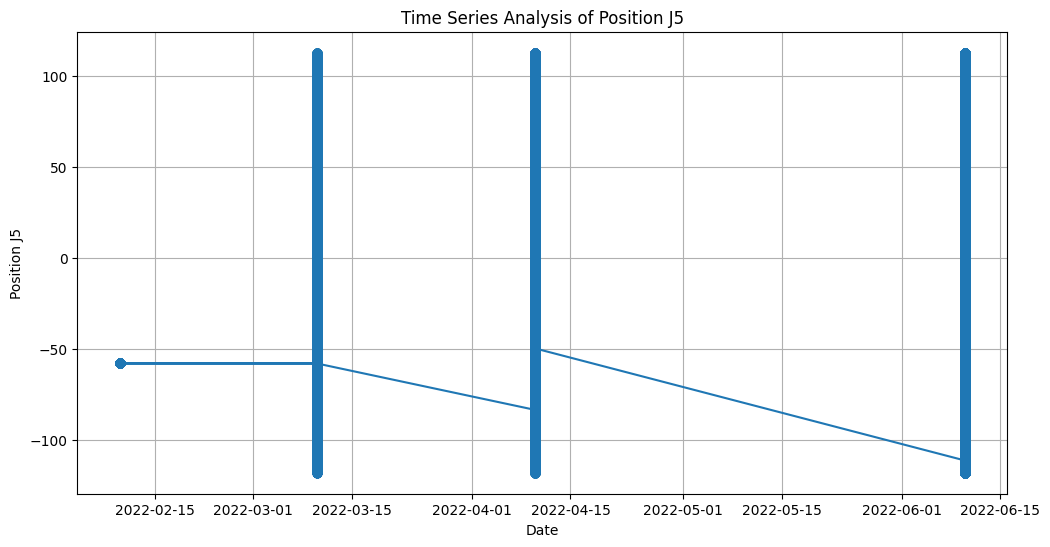

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J6')

Text(0.5, 1.0, 'Time Series Analysis of Position J6')

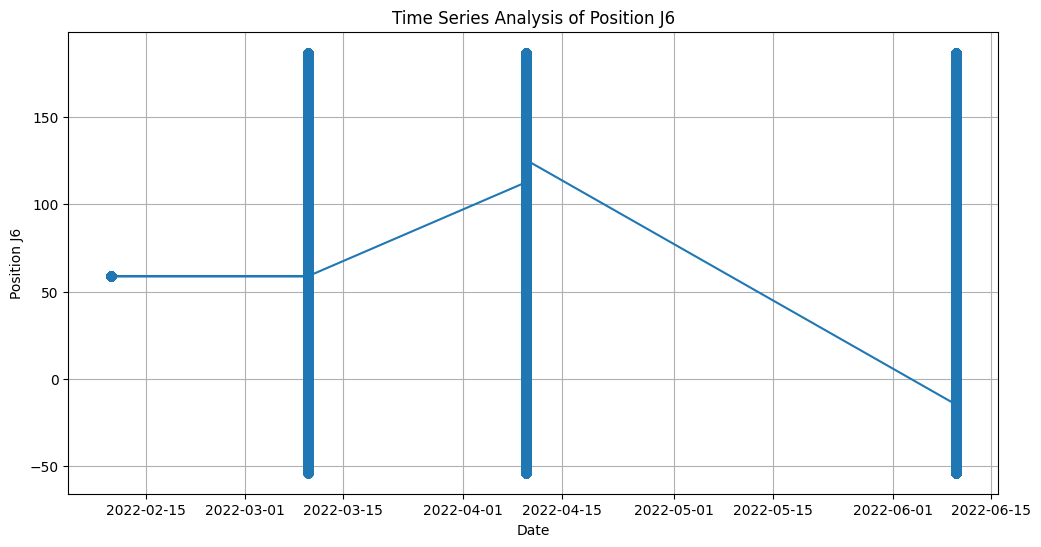

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])

# List of Position columns you want to analyze
position_columns = [
    'Position J1', 'Position J2', 'Position J3',
    'Position J4', 'Position J5', 'Position J6'
]

# Plot time series for each specified Position column
for column in position_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[column], marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Time Series Analysis of {column}')
    plt.grid(True)
    plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J1')

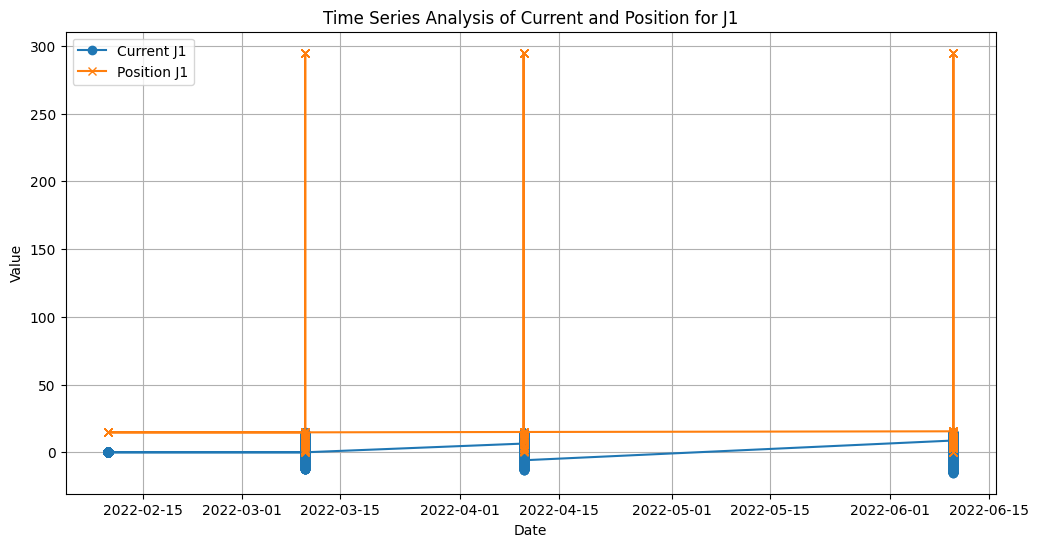

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J2')

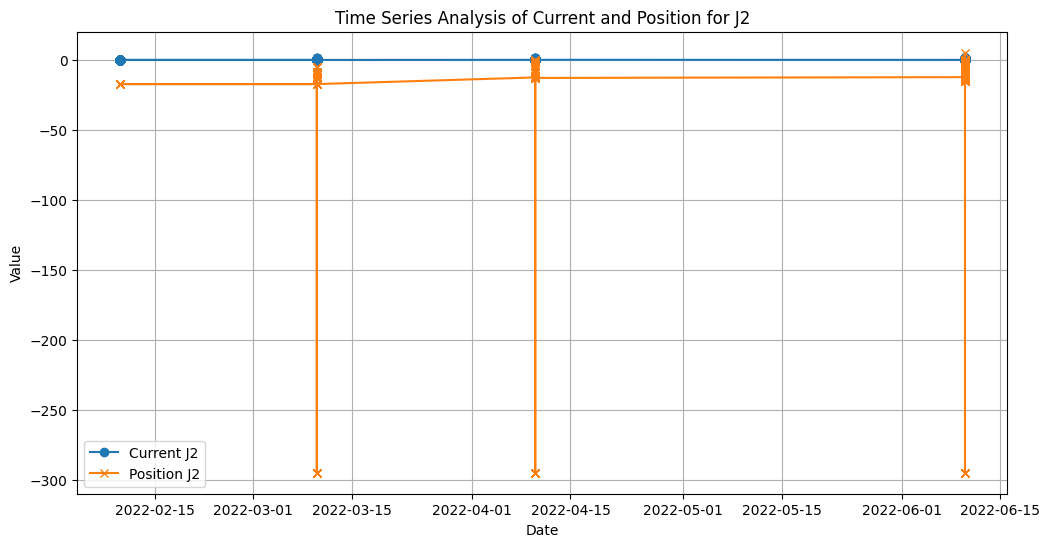

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J3')

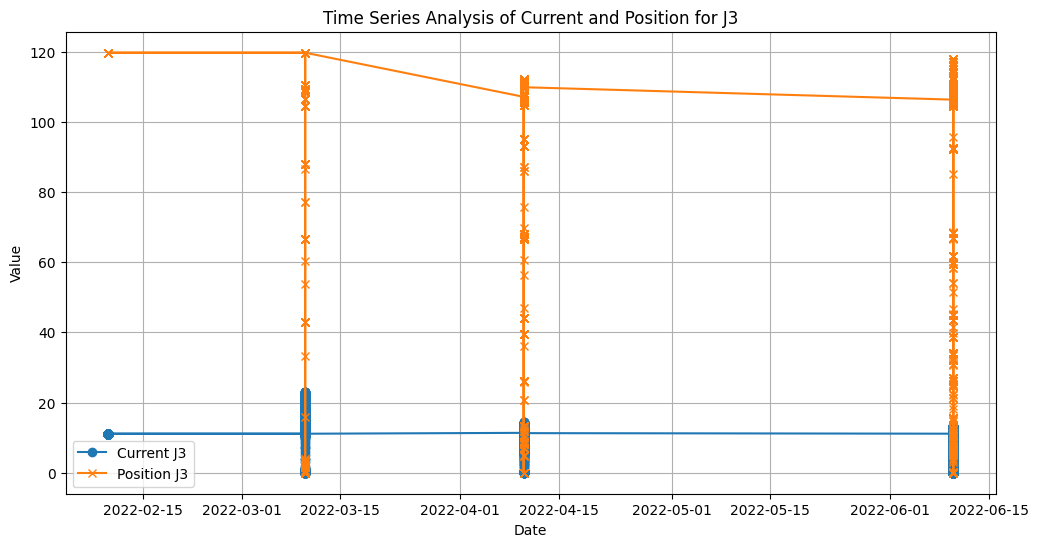

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J4')

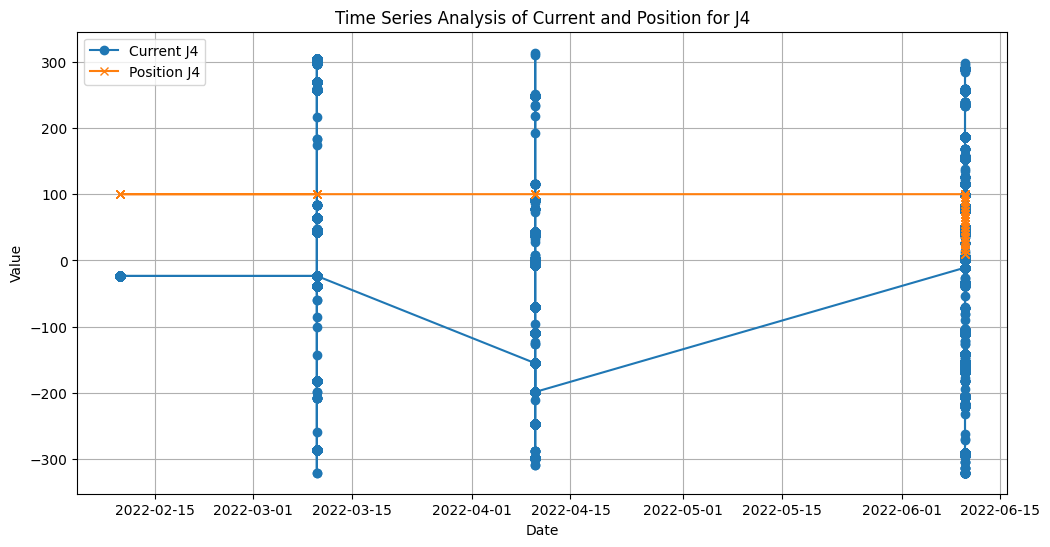

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J5')

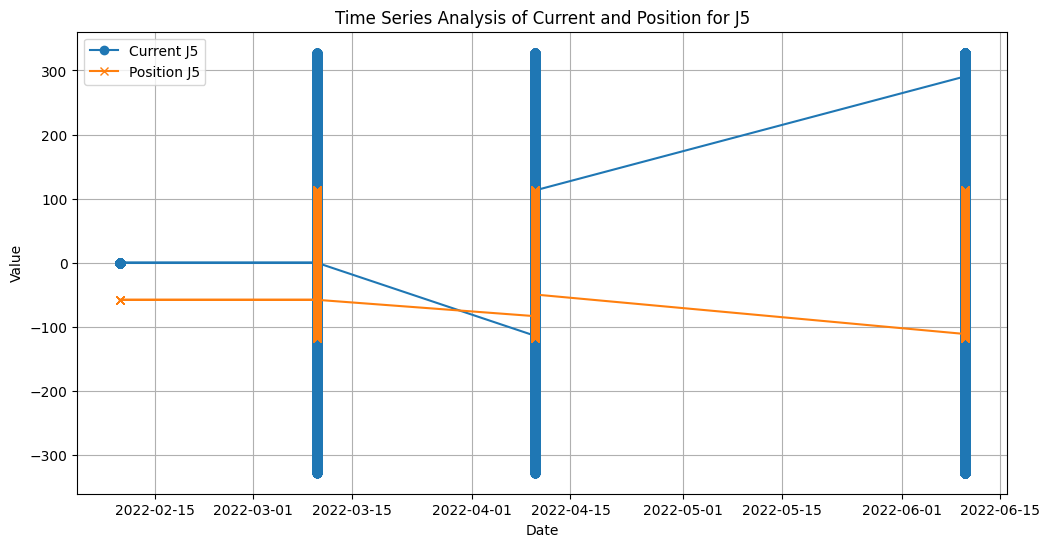

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J6')

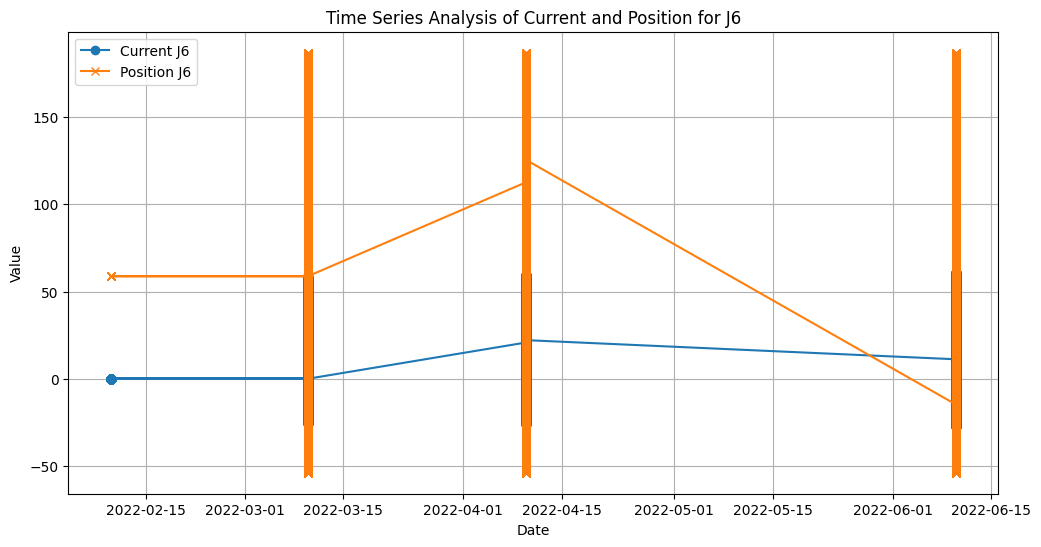

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# List of J columns you want to analyze
j_columns = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6']

# Create paired time series plots for Current and Position columns
for j in j_columns:
    current_column = f'Current {j}'
    position_column = f'Position {j}'

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[current_column], label=f'Current {j}', marker='o')
    plt.plot(df['Date'], df[position_column], label=f'Position {j}', marker='x')

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Time Series Analysis of Current and Position for {j}')
    plt.legend()
    plt.grid(True)
    plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current for All J Columns')

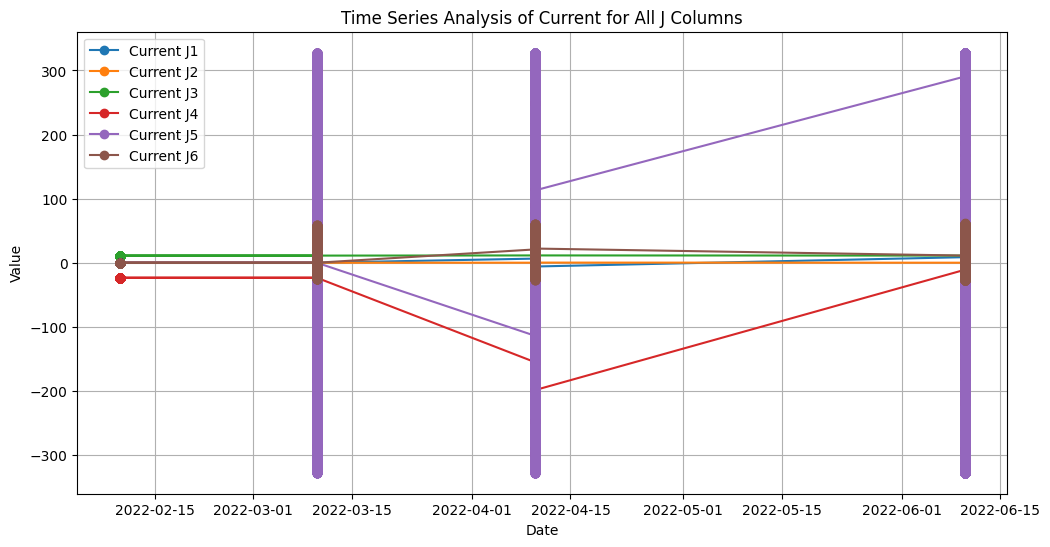

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# List of J columns you want to analyze
j_columns = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6']

# Create a single graph for all "Current J" columns
plt.figure(figsize=(12, 6))

for j in j_columns:
    current_column = f'Current {j}'
    plt.plot(df['Date'], df[current_column], label=f'Current {j}', marker='o')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Analysis of Current for All J Columns')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Position for All J Columns')

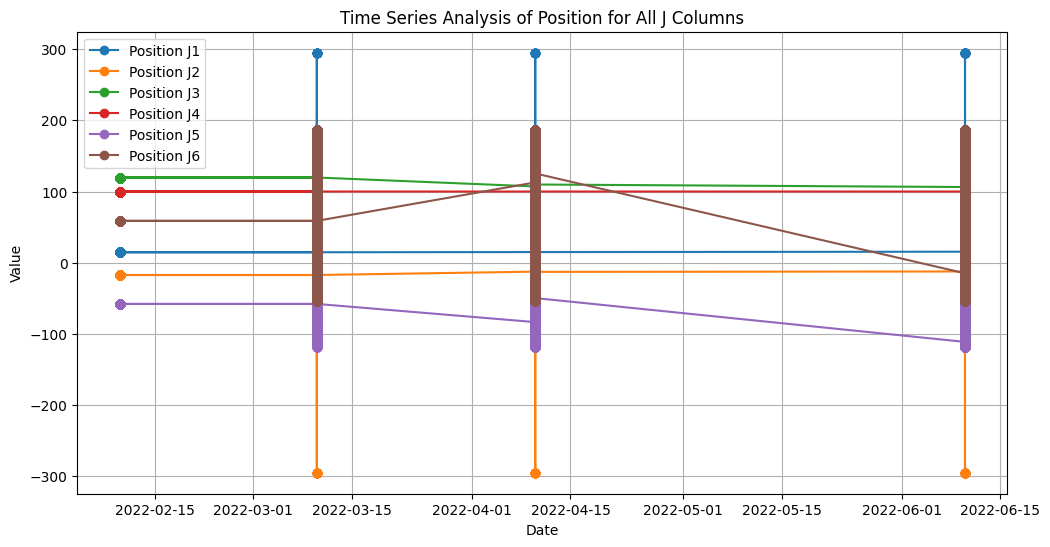

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])

# List of J columns you want to analyze
j_columns = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6']

# Create a single graph for all "Position J" columns
plt.figure(figsize=(12, 6))

for j in j_columns:
    position_column = f'Position {j}'
    plt.plot(df['Date'], df[position_column], label=f'Position {j}', marker='o')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Analysis of Position for All J Columns')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
df.tail()

Current J1  Position J1  Current J2  Position J2  Current J3  \
1048570         0.0        14.71         0.0       -17.26       11.11   
1048571         0.0        14.71         0.0       -17.26       11.11   
1048572         0.0        14.71         0.0       -17.26       11.11   
1048573         0.0        14.71         0.0       -17.26       11.11   
1048574         0.0        14.71         0.0       -17.26       11.11   

         Position J3  Current J4  Position J4  Current J5  Position J5  \
1048570       119.67      -23.44          100         0.0       -57.87   
1048571       119.67      -23.44          100         0.0       -57.87   
1048572       119.67      -23.44          100         0.0       -57.87   
1048573       119.67      -23.44          100         0.0       -57.87   
1048574       119.67      -23.44          100         0.0       -57.87   

         Current J6  Position J6                          Cycle Number  \
1048570        0.01        58.78  WSBYMBROW000061_11_20221002_04:47:05   
1048571        0.01        58.78  WSBYMBROW000061_11_20221002_04:47:05   
1048572        0.01        58.78  WSBYMBROW000061_11_20221002_04:47:05   
1048573        0.00        58.78  WSBYMBROW000061_11_20221002_04:47:05   
1048574        0.00        58.78  WSBYMBROW000061_11_20221002_04:47:05   

               Date TimeStamp  
1048570  03-10-2022  13:58:07  
1048571  03-10-2022  13:58:07  
1048572  03-10-2022  13:58:07  
1048573  03-10-2022  13:58:07  
1048574  03-10-2022  13:58:07

#TIME SERIES FORECASTING

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0108
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 7/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0047
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0046
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 13/50
250/250 [====

63/63 [==============================] - 0s 1ms/step - loss: 0.0046
Test Loss: 0.0046
63/63 [==============================] - 0s 1ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'RNN Time Series Forecasting for Current J1 and Position J1')

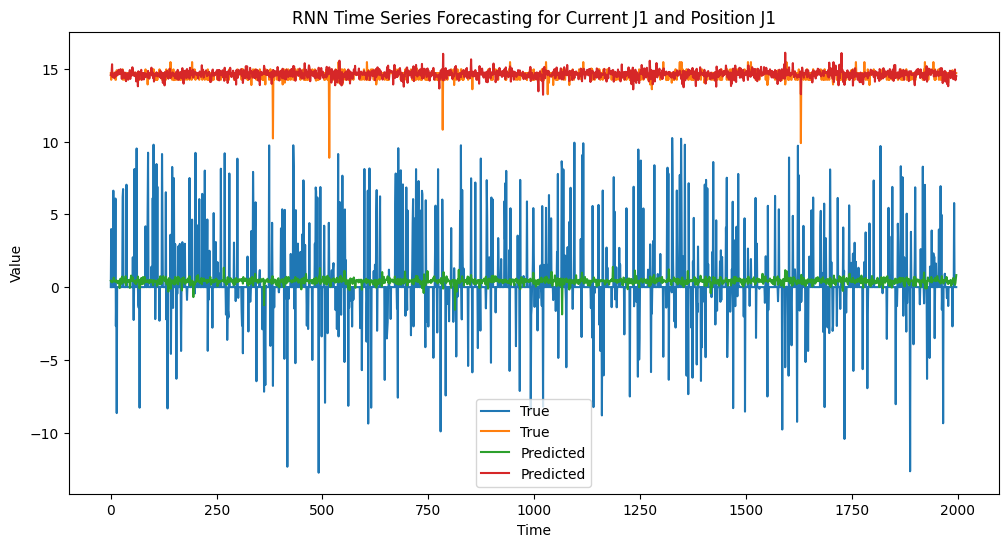

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the columns you want to use for prediction (e.g., Current J1 and Position J1)
features = ['Current J1', 'Position J1']

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Define the number of time steps (look-back) for the RNN
look_back = 10  # You can adjust this based on your data

# Create sequences of data with the specified look-back
X, y = [], []
for i in range(len(df) - look_back):
    X.append(df[features].iloc[i:i+look_back].values)
    y.append(df[features].iloc[i+look_back].values)

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build an RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(look_back, len(features))))
model.add(Dense(units=len(features)))  # Output layer with the same number of features

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('RNN Time Series Forecasting for Current J1 and Position J1')
plt.show()


Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.0435
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0094
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0093
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0094
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 13/50
250/250 [====

63/63 [==============================] - 0s 2ms/step - loss: 0.0091
Test Loss (Current): 0.0091
63/63 [==============================] - 0s 1ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Current Value')

Text(0.5, 1.0, 'RNN Time Series Forecasting for Current Values')

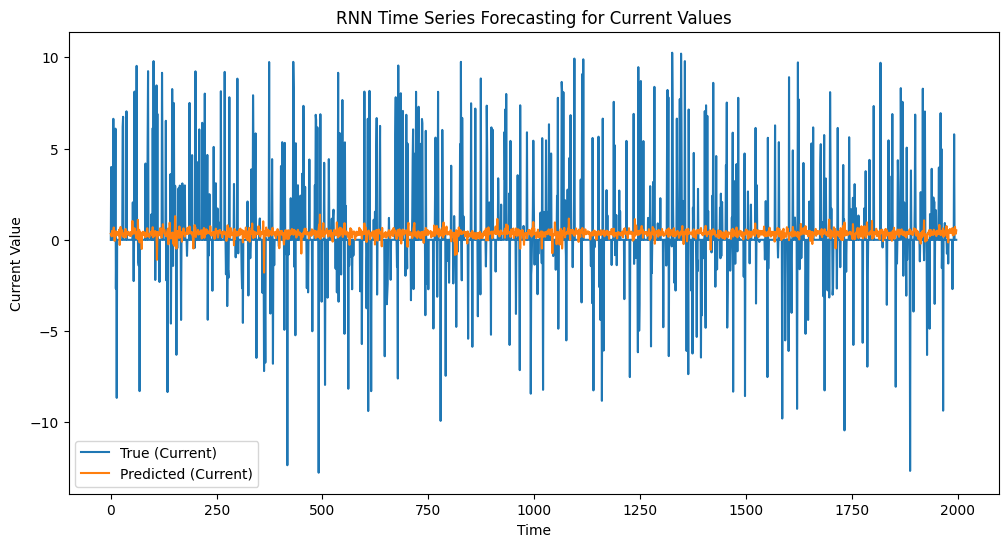

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Position Value')

Text(0.5, 1.0, 'Position Values Over Time')

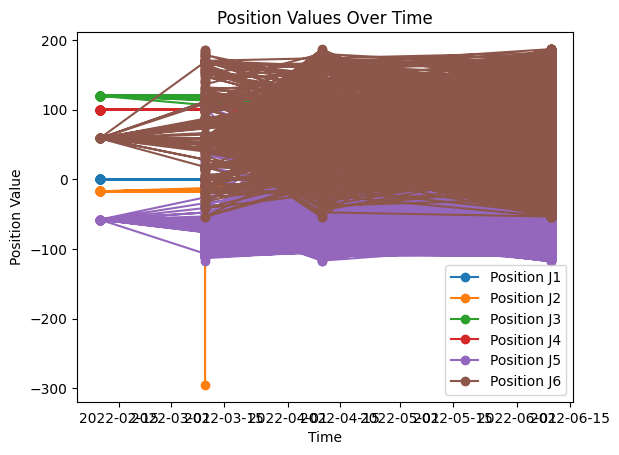

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the columns you want to use for prediction (e.g., Current J1 and Position J1)
current_features = ['Current J1']
position_features = ['Position J1']

# Normalize the data using Min-Max scaling separately for current and position features
scaler_current = MinMaxScaler()
scaler_position = MinMaxScaler()
df[current_features] = scaler_current.fit_transform(df[current_features])
df[position_features] = scaler_position.fit_transform(df[position_features])

# Define the number of time steps (look-back) for the RNN
look_back = 10  # You can adjust this based on your data

# Create sequences of data with the specified look-back
X_current, X_position, y = [], [], []
for i in range(len(df) - look_back):
    X_current.append(df[current_features].iloc[i:i+look_back].values)
    X_position.append(df[position_features].iloc[i:i+look_back].values)
    y.append(df[current_features].iloc[i+look_back].values)

X_current = np.array(X_current)
X_position = np.array(X_position)
y = np.array(y)

# Split the data into training and testing sets
X_current_train, X_current_test, X_position_train, X_position_test, y_train, y_test = train_test_split(
    X_current, X_position, y, test_size=0.2, random_state=42)

# Build an RNN model for current values
model_current = Sequential()
model_current.add(SimpleRNN(units=50, activation='relu', input_shape=(look_back, len(current_features))))
model_current.add(Dense(units=len(current_features)))  # Output layer with the same number of current features

# Compile the current model
model_current.compile(optimizer='adam', loss='mean_squared_error')

# Train the current model
model_current.fit(X_current_train, y_train, epochs=50, batch_size=32)

# Evaluate the current model
loss_current = model_current.evaluate(X_current_test, y_test)
print(f'Test Loss (Current): {loss_current:.4f}')

# Make predictions for current
predictions_current = model_current.predict(X_current_test)

# Inverse transform the scaled current predictions to the original scale
predictions_current = scaler_current.inverse_transform(predictions_current)
y_test_current = scaler_current.inverse_transform(y_test)

# Plot the results for current values
plt.figure(figsize=(12, 6))
plt.plot(y_test_current, label='True (Current)')
plt.plot(predictions_current, label='Predicted (Current)')
plt.xlabel('Time')
plt.ylabel('Current Value')
plt.legend()
plt.title('RNN Time Series Forecasting for Current Values')
plt.show()

# Plot position columns
for j in range(1, 7):
    position_column = f'Position J{j}'
    plt.plot(df.index, df[position_column], label=f'Position J{j}', marker='o')

plt.xlabel('Time')
plt.ylabel('Position Value')
plt.legend()
plt.title('Position Values Over Time')
plt.show()


In [12]:
pip install PyWavelets


In [15]:
df.tail()

Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10    0.506874     0.049878        0.00       -17.26       11.11   
2022-06-10    0.904124     0.052455        0.32       -12.28       10.66   
2022-06-10    0.589363     0.049946        0.04       -13.01       11.03   
2022-06-10    0.718524     0.048318        0.12       -15.06       11.78   
2022-03-10    0.506874     0.049878        0.00       -17.26       11.11   

            Position J3  Current J4  Position J4  Current J5  Position J5  \
Date                                                                        
2022-03-10       119.67      -23.44          100        0.00       -57.87   
2022-06-10       104.97      -33.56          100      299.00       106.60   
2022-06-10       108.91     -161.64          100       45.28       -63.12   
2022-06-10       117.87     -141.36          100      236.44       -76.68   
2022-03-10       119.67      -23.44          100        0.00       -57.87   

            Current J6  Position J6                          Cycle Number  \
Date                                                                        
2022-03-10        0.00        58.78  WSBYMBROW000061_11_20221002_04:47:05   
2022-06-10       12.00        85.62  WSBYMBROW000061_11_20221006_16:37:58   
2022-06-10       15.42       170.43  WSBYMBROW000061_11_20221006_17:18:36   
2022-06-10      -25.83        15.69  WSBYMBROW000061_11_20221006_23:11:22   
2022-03-10        0.00        58.78  WSBYMBROW000061_11_20221002_04:47:05   

           TimeStamp  
Date                  
2022-03-10  01:03:24  
2022-06-10  16:38:23  
2022-06-10  17:18:48  
2022-06-10  23:11:57  
2022-03-10  14:05:31

#WAVELET TRANSFORMATIONS

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J1')

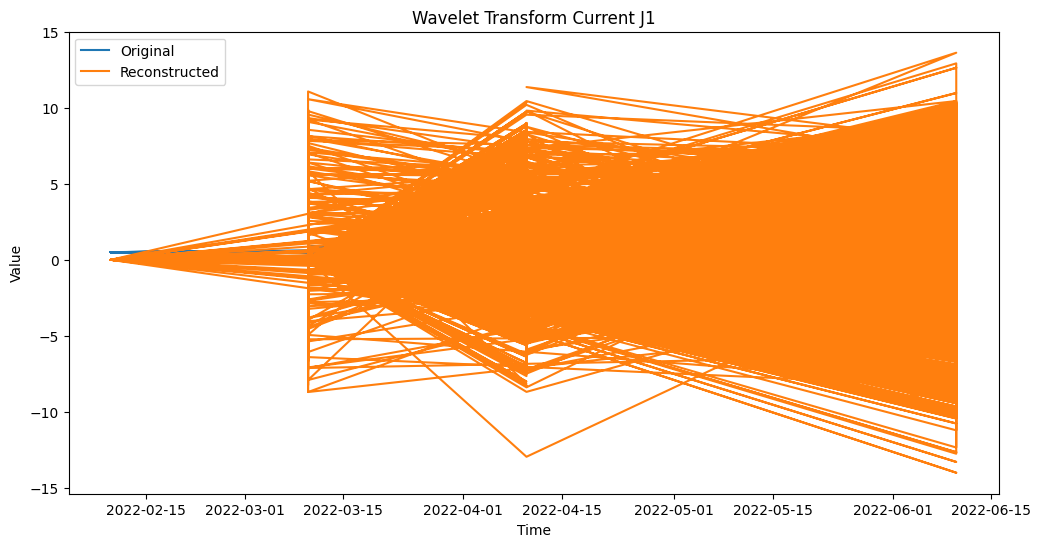

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler


# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J1'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J1')
plt.show()


In [11]:
# 2.1 Load the data
df = pd.read_csv(path)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J1')

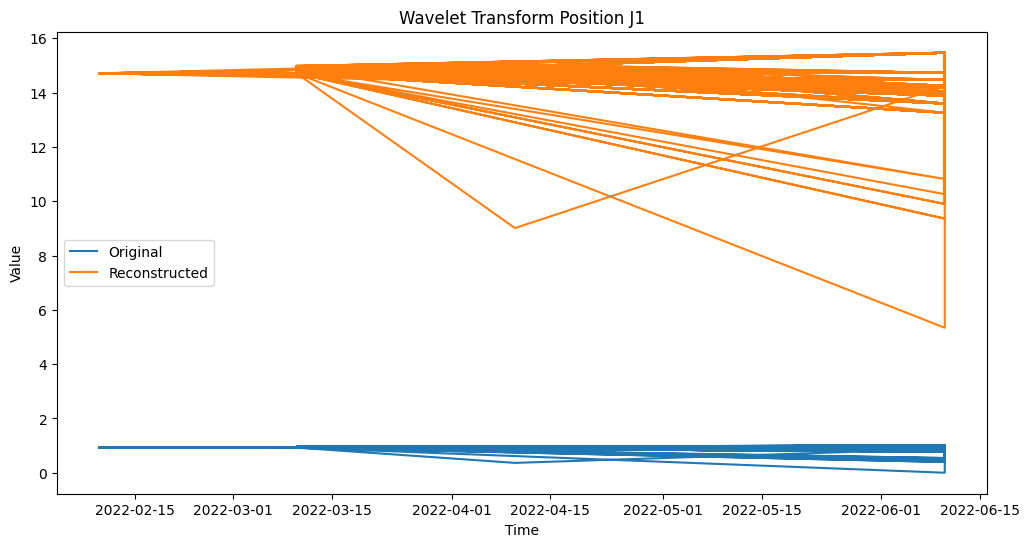

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler


# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J1'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J1')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J2')

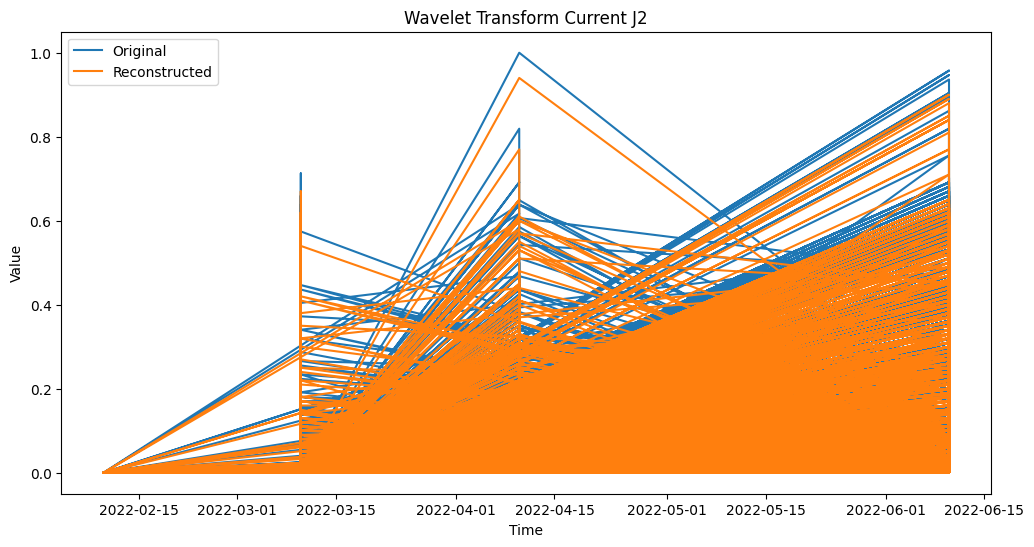

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J2'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J2')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J2')

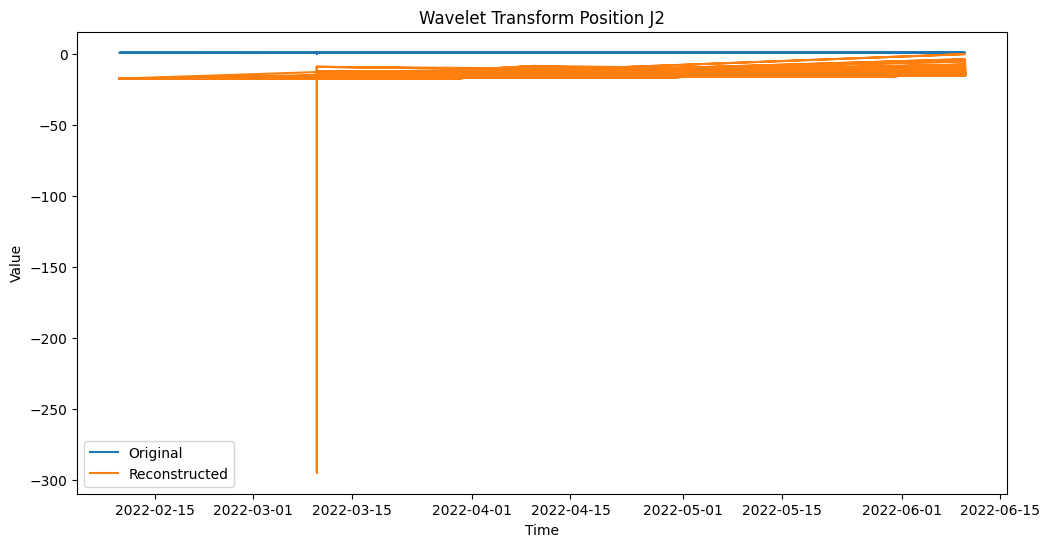

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J2'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J2')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J3')

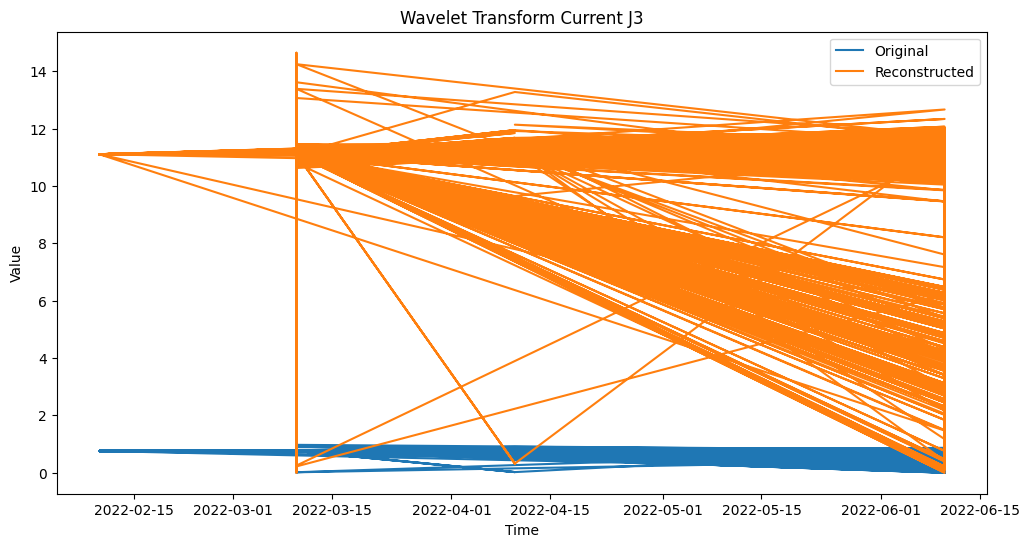

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J3'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J3')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J3')

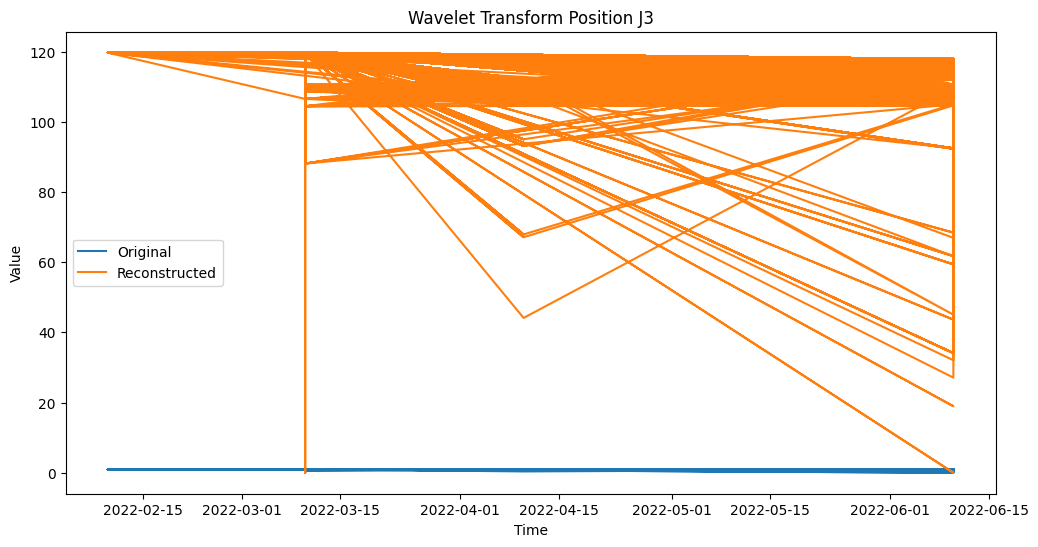

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J3'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J3')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J4')

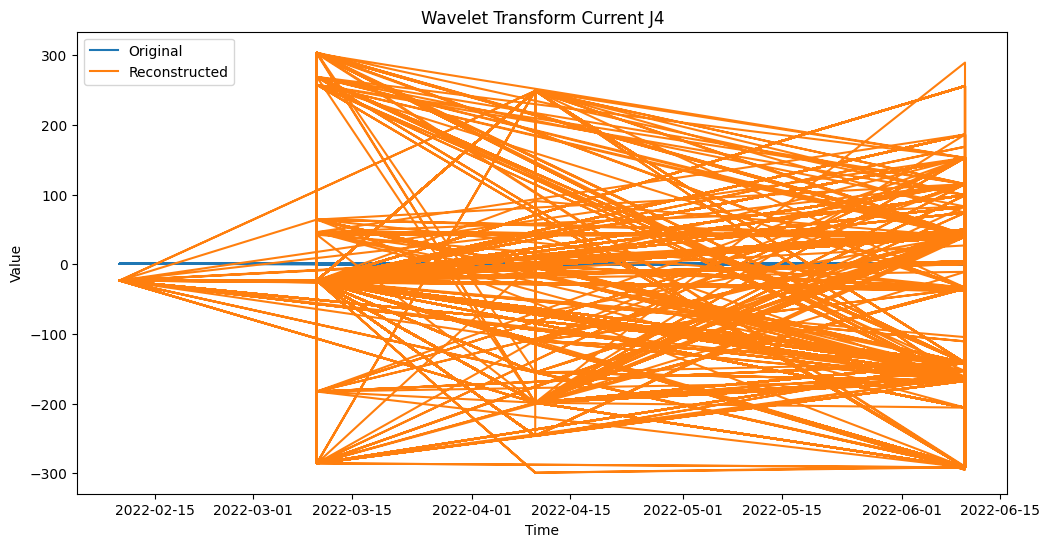

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J4'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J4')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J4')

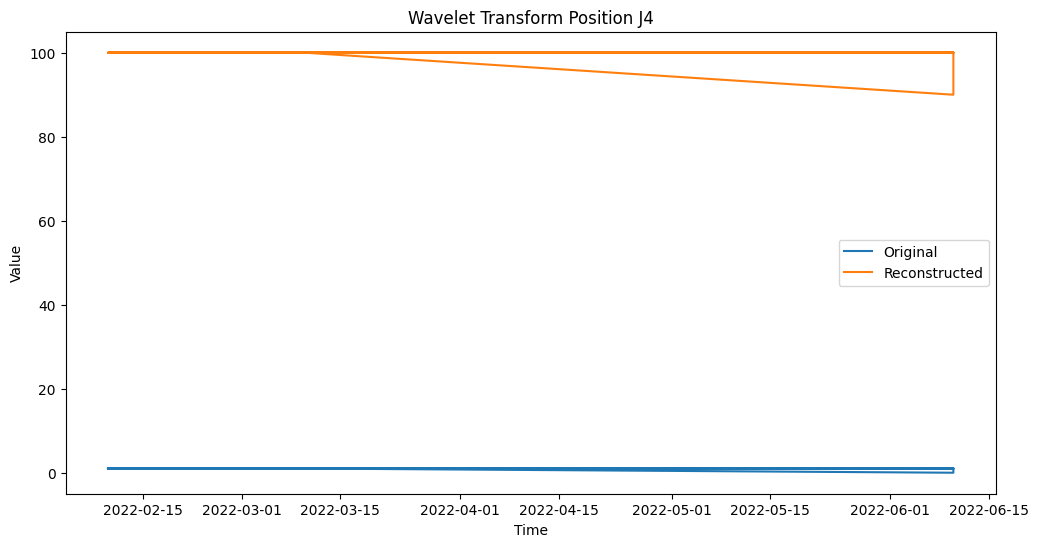

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J4'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J4')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J5')

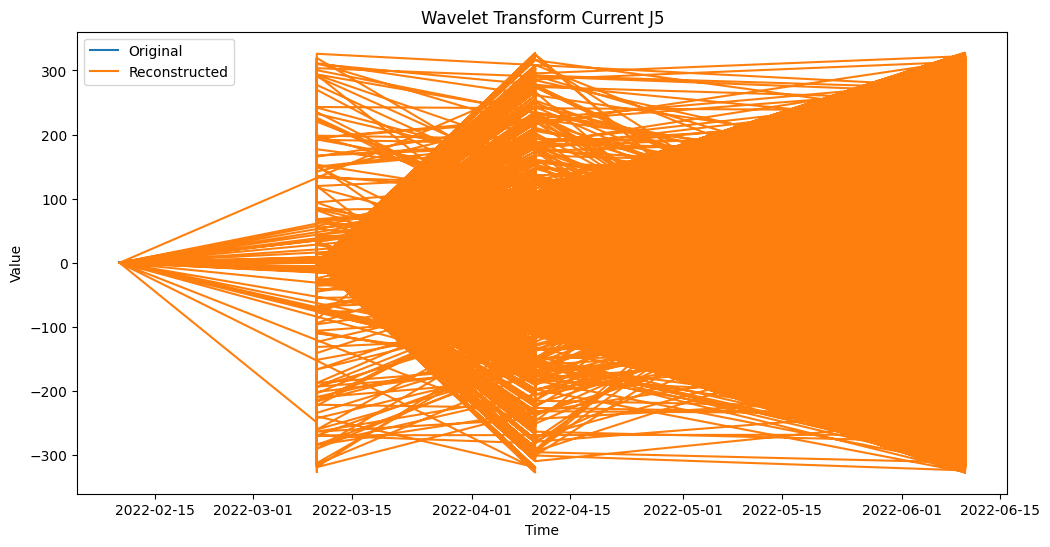

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J5'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J5')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J5')

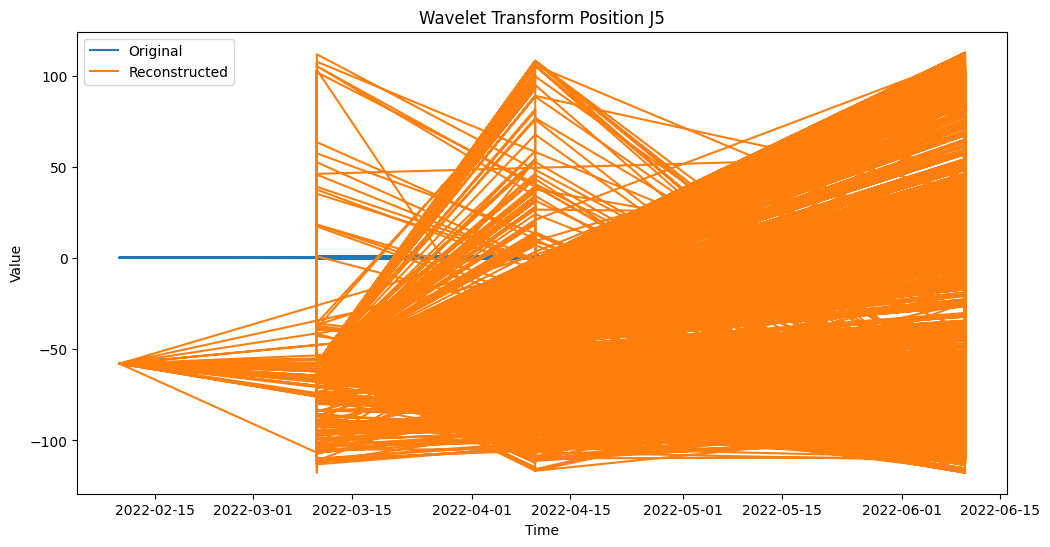

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J5'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J5')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J6')

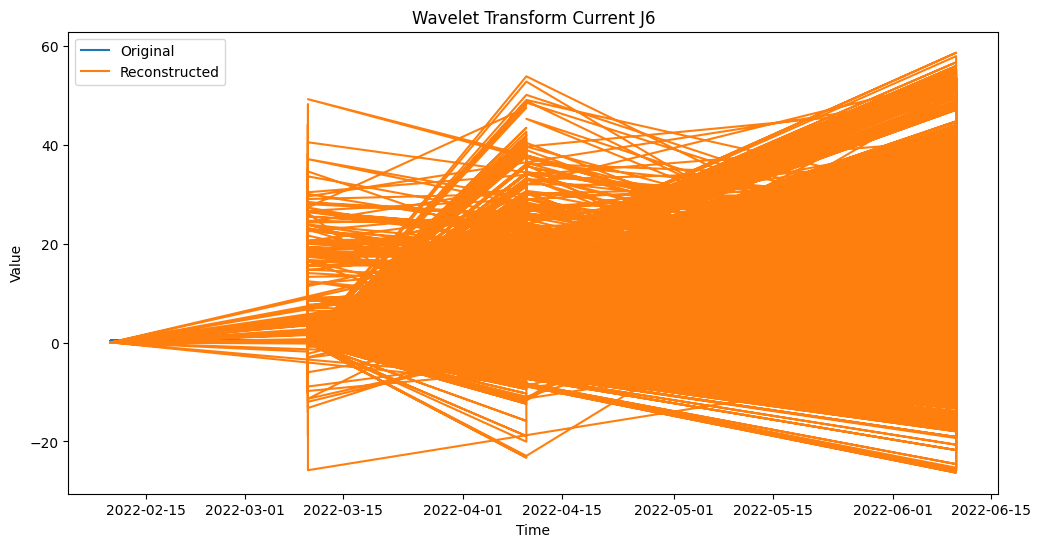

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J6'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J6')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J6')

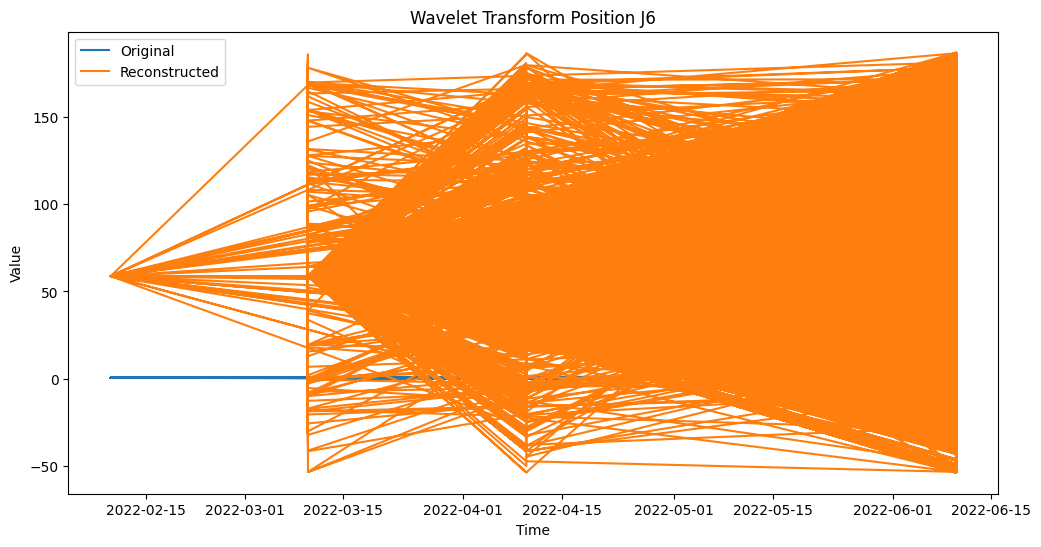

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J6'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J6')
plt.show()


#ANOMALIES DETECTION USING AUTOENCODERS

Epoch 1/50
250/250 [==============================] - 2s 4ms/step - loss: 0.0092 - val_loss: 0.0091
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0070
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 9.2454

63/63 [==============================] - 0s 1ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J1')

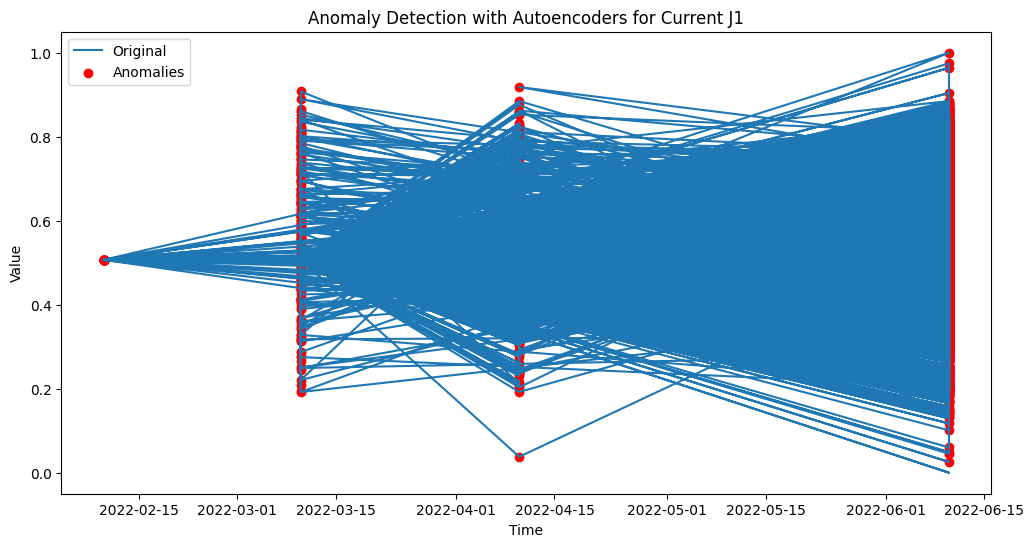

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10    0.506874        14.71        0.00       -17.26       11.11   
2022-03-10    0.506874        14.71        0.00       -17.26       11.11   
2022-03-10    0.506874        14.71        0.00       -17.26       11.11   
2022-03-10    0.506874        14.71        0.00       -17.26       11.11   
2022-06-10    0.422938        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10    0.566932        14.25        0.01       -15.06       11.69   
2022-03-10    0.506874        14.71        0.00       -17.26       11.11   
2022-03-10    0.506874        14.71        0.00       -17.26       11.11   
2022-03-10    0.506874        14.71        0.00       -17.26       11.11   
2022-03-10    0.506874        14.71        0.00       -17.26       11.11   

           

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J1'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J1')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1590 - val_loss: 0.1140
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0776 - val_loss: 0.0476
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0308 - val_loss: 0.0184
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0123 - val_loss: 0.0077
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 0.0035
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 8.7880e-04
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 7.6444e-04 - val_loss: 4.5457e-04
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 4.5485e-04 - val_loss: 2.3524e-04
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 2.935

63/63 [==============================] - 0s 773us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J1')

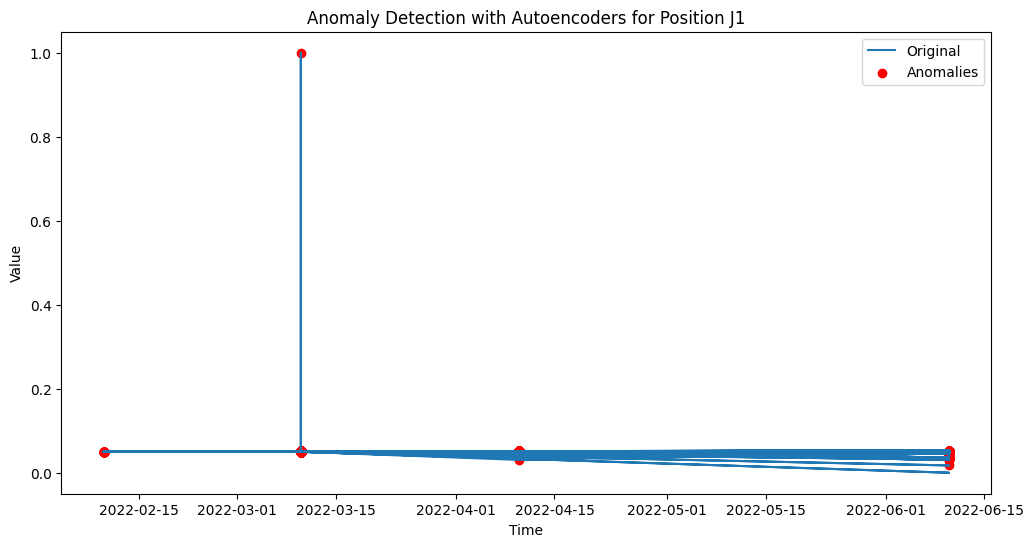

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00     0.049878        0.00       -17.26       11.11   
2022-03-10        0.00     0.049878        0.00       -17.26       11.11   
2022-03-10        0.00     0.049878        0.00       -17.26       11.11   
2022-03-10        0.00     0.049878        0.00       -17.26       11.11   
2022-06-10       -2.32     0.047640        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66     0.048318        0.01       -15.06       11.69   
2022-03-10        0.00     0.049878        0.00       -17.26       11.11   
2022-03-10        0.00     0.049878        0.00       -17.26       11.11   
2022-03-10        0.00     0.049878        0.00       -17.26       11.11   
2022-03-10        0.00     0.049878        0.00       -17.26       11.11   

           

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J1'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J1')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1472 - val_loss: 0.0744
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0420 - val_loss: 0.0231
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0165 - val_loss: 0.0126
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0078
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0045
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0014

63/63 [==============================] - 0s 2ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J2')

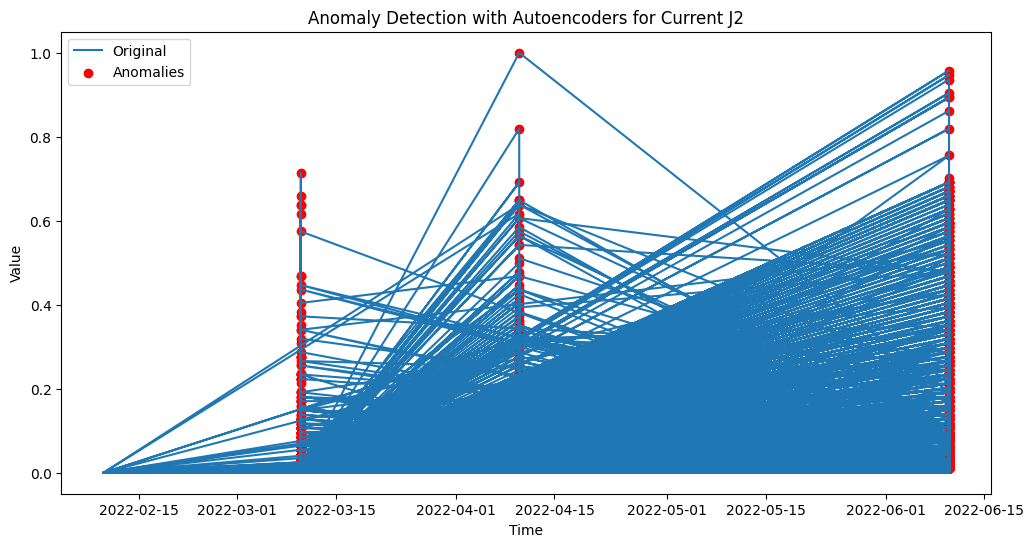

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-06-10       -2.32        14.05    0.138298       -13.82       11.26   
2022-06-10        0.20         9.90    0.085106       -12.95       12.67   
2022-04-10       -5.01        14.97    0.042553       -12.86       11.19   
2022-06-10        8.65        14.73    0.053191       -13.30       11.62   
2022-06-10        0.92        14.25    0.063830       -13.94       11.54   
...                ...          ...         ...          ...         ...   
2022-06-10        0.12        14.25    0.393617       -14.75       11.78   
2022-04-10        6.26        14.97    0.095745       -12.86       11.29   
2022-03-10        9.79        14.98    0.372340       -12.67       10.70   
2022-06-10       -3.54        14.25    0.287234       -14.75       11.31   
2022-06-10        1.66        14.25    0.010638       -15.06       11.69   

           

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J2'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J2')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0869 - val_loss: 0.0466
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0266 - val_loss: 0.0135
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0081 - val_loss: 0.0045
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.2161e-04
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 5.4516e-04 - val_loss: 3.2352e-04
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 2.8676e-04 - val_loss: 1.5519e-04
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1.7835e-04 - val_loss: 8.3189e-05
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1.3310e-04 - val_loss: 5.2556e-05
Epoch 10/50
250/250 [==============================] - 0s 2ms/st

63/63 [==============================] - 0s 794us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J2')

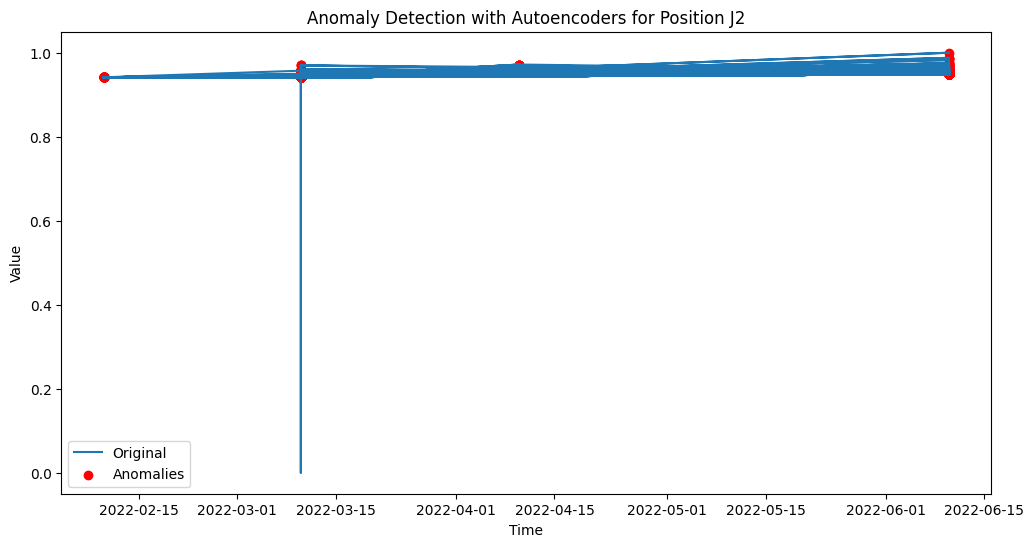

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-06-10       -2.32        14.05        0.13     0.953140       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01     0.948935       11.69   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   

           

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J2'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J2')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0052 - val_loss: 0.0025
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0011

63/63 [==============================] - 0s 799us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J3')

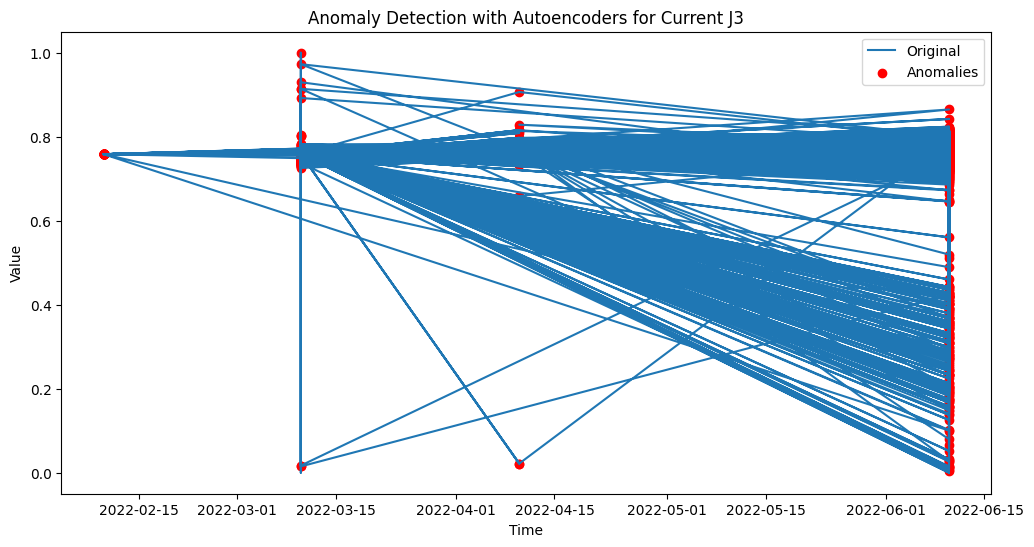

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-06-10       -2.32        14.05        0.13       -13.82    0.768601   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06    0.797952   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   

           

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J3'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J3')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 2s 4ms/step - loss: 0.1388 - val_loss: 0.0451
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0252 - val_loss: 0.0134
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092 - val_loss: 0.0062
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0022

63/63 [==============================] - 0s 1ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J3')

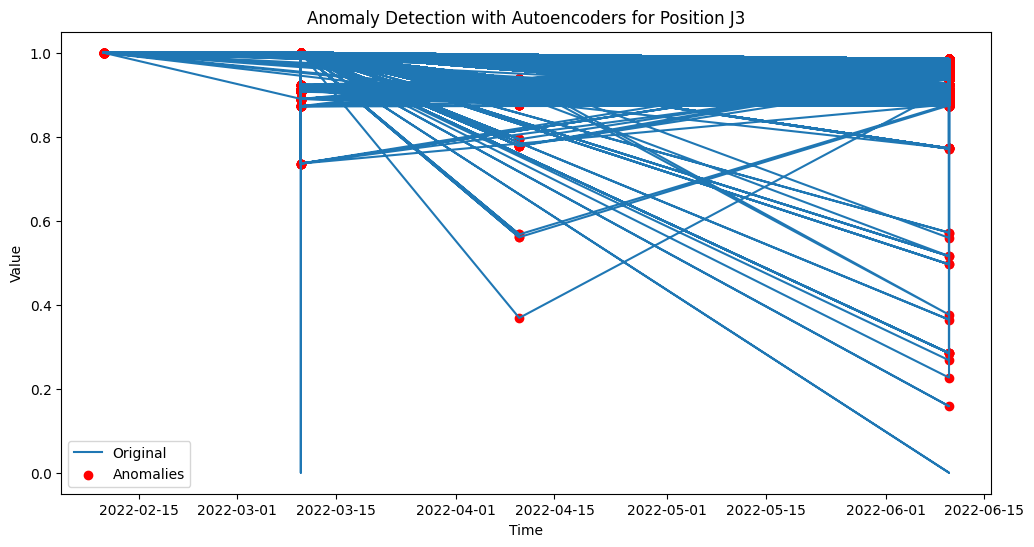

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J3'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J3')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.0186 - val_loss: 0.0179
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0134 - val_loss: 0.0123
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0086 - val_loss: 0.0074
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 9.8874e-04 - val_loss: 9.3852e-04
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 7.3264e-04 - val_loss: 7.2418e-04
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 5.7741e-04 - val_loss: 5.8531e-04
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 4

63/63 [==============================] - 0s 804us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J4')

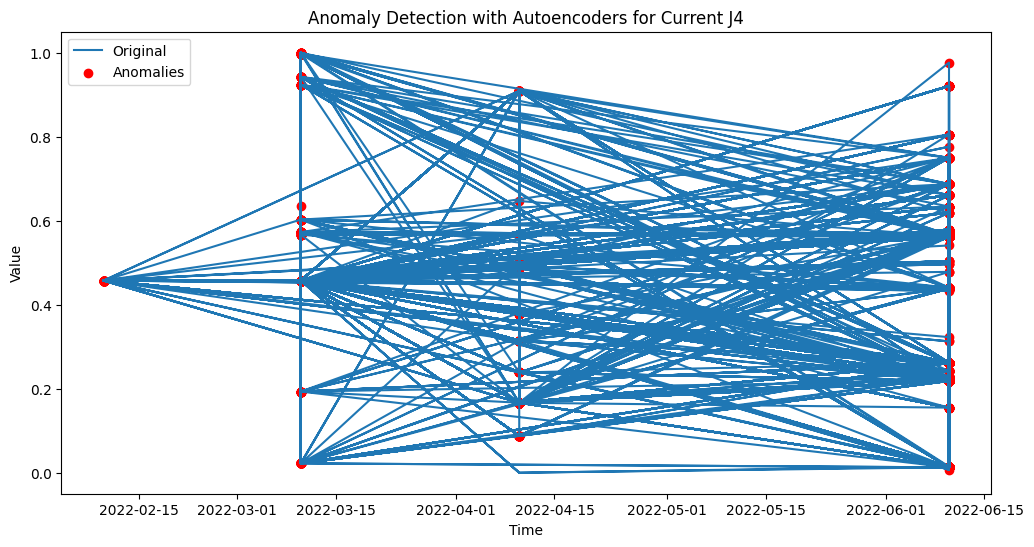

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J4'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J4')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0558 - val_loss: 0.0181
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0055
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 6.6075e-04 - val_loss: 8.5810e-04
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 4.5765e-04 - val_loss: 7.1195e-04
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 3.3199e-04 - val_loss: 6.2020e-04
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 2.4913e-04 - val_loss: 5.5969e-04
Epoch 10/50
250/250 [==============================] - 0s 2ms/step -

63/63 [==============================] - 0s 892us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J4')

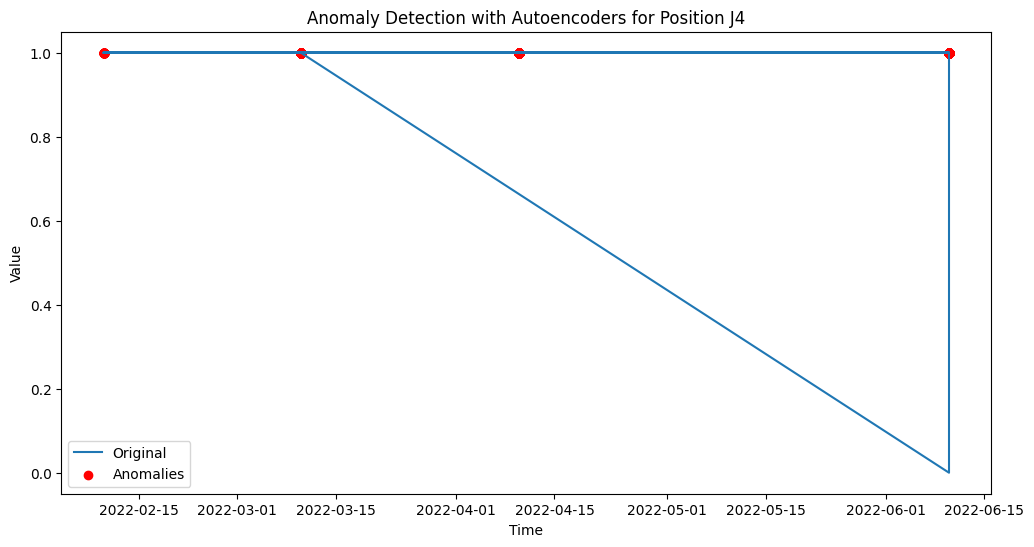

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J4'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J4')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0190 - val_loss: 0.0168
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0123
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0081
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0048
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 9.3511e-04
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 7.8514e-04 - val_loss: 6.5554e-04
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 5.7870e-04 - val_loss: 5.1499e-04
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 4.625

63/63 [==============================] - 0s 895us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J5')

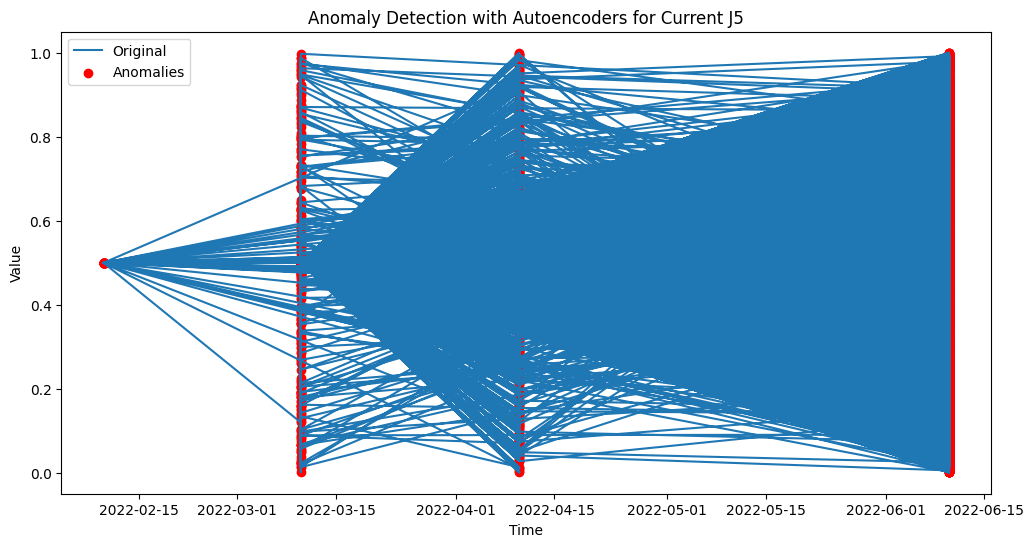

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J5'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J5')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0369 - val_loss: 0.0289
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0222
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0141
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0072
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 7.1646e-04 - val_loss: 6.6120e-04
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 5.1447e-04 - val_loss: 5.1142e-04
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 4.2733e-0

63/63 [==============================] - 0s 903us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J5')

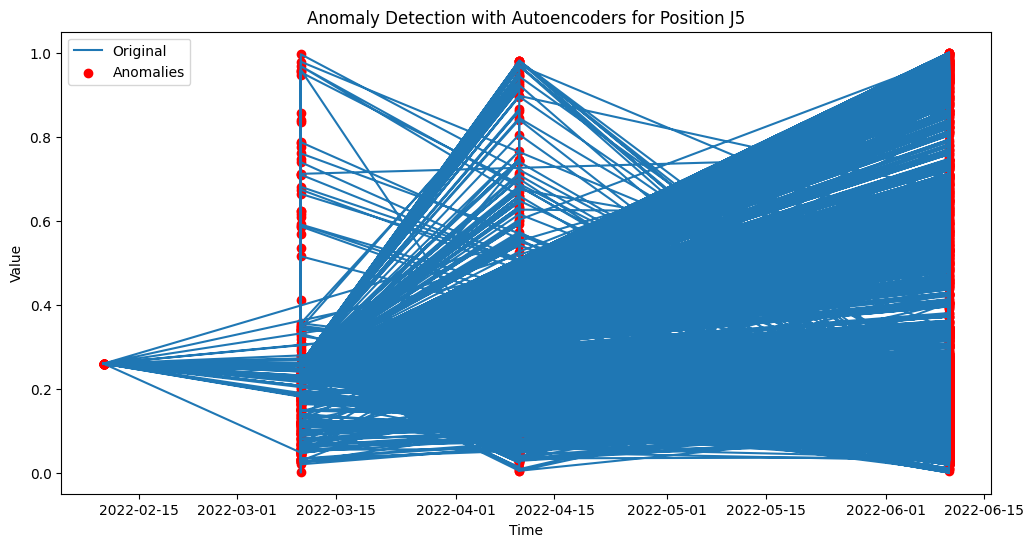

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J5'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J5')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0202 - val_loss: 0.0156
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0119
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0077
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0040
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 7.7345e-04
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 6.0618e-04 - val_loss: 3.9512e-04
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 3.7417e-04 - val_loss: 2.6876e-04
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 2.8872e-04 - val_loss: 2.1735e-04
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - los

63/63 [==============================] - 0s 920us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J6')

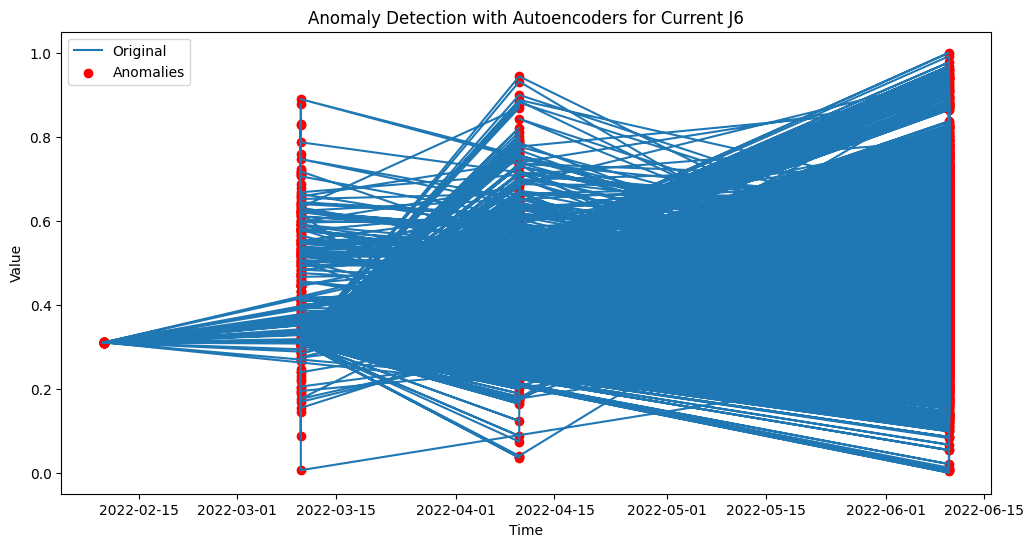

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J6'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J6')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 2s 5ms/step - loss: 0.0243 - val_loss: 0.0239
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0204 - val_loss: 0.0187
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0150 - val_loss: 0.0130
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0085
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0064 - val_loss: 0.0054
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0011

63/63 [==============================] - 0s 876us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J6')

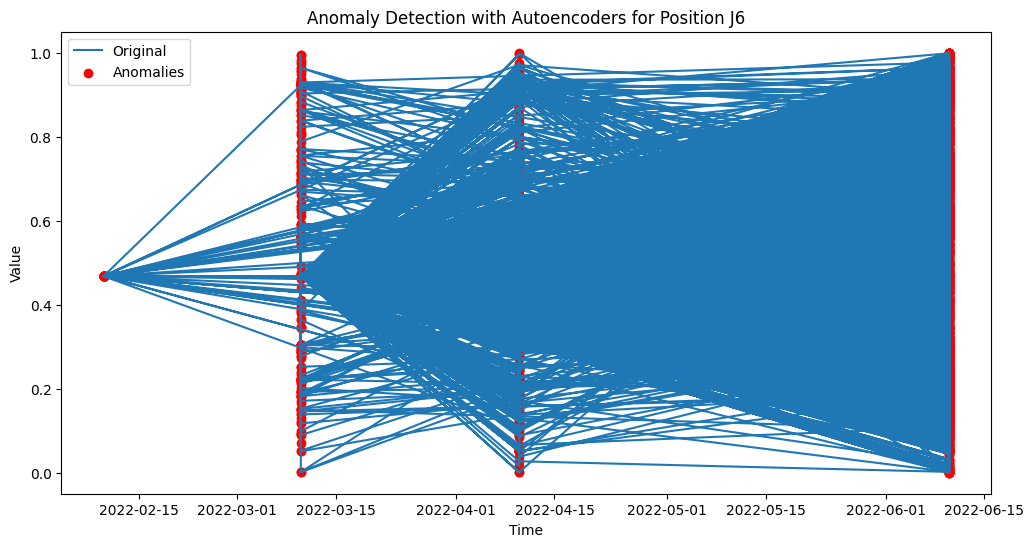

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J6'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J6')
plt.show()

# Print the anomalies
print(anomalies)
